# Сборный проект

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Описание данных:**

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы долларов)
- EU_sales — продажи в Европе (миллионы долларов)
- JP_sales — продажи в Японии (миллионы долларов)
- Other_sales — продажи в других странах (миллионы долларов)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Шаг 1. Откроем и изучим данные

In [4]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats as st
import numpy as np

In [5]:
games = pd.read_csv('/datasets/games.csv')
games

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [6]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Некоторые столбцы представлены не в том формате, в котором они должны быть

In [7]:
games['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Дубликатов, на первый взгляд, не видно

In [8]:
games.sort_values('Year_of_Release')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1764,Kaboom!,2600,1980.0,Misc,1.07,0.07,0.0,0.01,NaN,NaN,NaN
546,Missile Command,2600,1980.0,Shooter,2.56,0.17,0.0,0.03,NaN,NaN,NaN
1968,Defender,2600,1980.0,Misc,0.99,0.05,0.0,0.01,NaN,NaN,NaN
6300,Bridge,2600,1980.0,Misc,0.25,0.02,0.0,0.00,NaN,NaN,NaN
6875,Checkers,2600,1980.0,Misc,0.22,0.01,0.0,0.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.0,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.0,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.0,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.0,0.00,NaN,NaN,NaN


Адекватные года выпуска игр. 

In [9]:
games['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

Среди игровых жанров нет дубликатов. Подметим значение "nan". Предстоит работа с пропущенными значениями

In [10]:
games.sort_values('NA_sales', ascending=False) 

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
...,...,...,...,...,...,...,...,...,...,...,...
11730,Tales of Fandom Vol.2,PS2,2007.0,Role-Playing,0.00,0.00,0.08,0.00,NaN,NaN,NaN
11729,One Piece: Gear Spirit,DS,2007.0,Fighting,0.00,0.00,0.08,0.00,NaN,NaN,NaN
11718,Fate/Tiger Colosseum,PSP,2007.0,Fighting,0.00,0.00,0.08,0.00,NaN,NaN,NaN
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T


В Северной Америке игровая индустрия очень популярна, но при этом в данных отсутствуют "подозрительные" сотни миллонов долларов.


In [11]:
games.sort_values('EU_sales', ascending=False) 

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
19,Brain Age: Train Your Brain in Minutes a Day,DS,2005.0,Misc,4.74,9.20,4.16,2.04,77.0,7.9,E
...,...,...,...,...,...,...,...,...,...,...,...
11018,NERF N-Strike: Double Blast Bundle,Wii,2010.0,Shooter,0.09,0.00,0.00,0.00,NaN,tbd,E10+
2715,Super Monkey Ball: Touch & Roll,DS,2005.0,Misc,0.69,0.00,0.00,0.06,NaN,NaN,NaN
11016,Samurai Shodown Anthology,PSP,NaN,Fighting,0.08,0.00,0.00,0.01,NaN,tbd,T
11013,Riviera: The Promised Land,PSP,2006.0,Role-Playing,0.07,0.00,0.02,0.01,68.0,7.7,T


Как и в Северной Америке, в Европе отсутствуют "подозрительные значения". 

Отметим так же, что в ТОП-5 появилист новые кандидаты, но "Wii Sports" удерживает место на верхушке

In [12]:
games.sort_values('JP_sales', ascending=False) 

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
20,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9542,The Stronghold Collection,PC,2009.0,Strategy,0.03,0.08,0.00,0.02,NaN,tbd,T
4462,SingStar Queen,PS3,2009.0,Misc,0.11,0.25,0.00,0.07,NaN,NaN,NaN
4460,SpongeBob's Atlantis SquarePantis,PS2,2007.0,Action,0.36,0.01,0.00,0.06,NaN,tbd,E
4459,NFL Blitz 20-03,PS2,2002.0,Sports,0.21,0.17,0.00,0.06,73.0,8.6,E


Совершенно иной ТОП-5 в Японии. "Аномальные" данные отсутствуют.

In [13]:
games.sort_values('Other_sales', ascending=False) 

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
17,Grand Theft Auto: San Andreas,PS2,2004.0,Action,9.43,0.40,0.41,10.57,95.0,9,M
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
48,Gran Turismo 4,PS2,2004.0,Racing,3.01,0.01,1.10,7.53,89.0,8.5,E
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
...,...,...,...,...,...,...,...,...,...,...,...
11810,PhotoKano,PSV,2013.0,Adventure,0.00,0.00,0.07,0.00,NaN,NaN,NaN
11808,Gladius,GC,2003.0,Strategy,0.06,0.01,0.00,0.00,82.0,8.8,T
11807,And1 Streetball,XB,2006.0,Action,0.06,0.02,0.00,0.00,NaN,NaN,NaN
11804,Touch Detective: Nameko Shigeru,3DS,2013.0,Adventure,0.00,0.00,0.07,0.00,NaN,NaN,NaN


"Аномальных" данных нет, появились новые игры в ТОП-5, но также прослеживаются лидеры из Северной Америки и Европы

In [14]:
games.describe()[['NA_sales', 'EU_sales', 'JP_sales', 'Other_sales']]

,NA_sales,EU_sales,JP_sales,Other_sales
count,16715.000000,16715.000000,16715.000000,16715.000000
mean,0.263377,0.145060,0.077617,0.047342
std,0.813604,0.503339,0.308853,0.186731
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.080000,0.020000,0.000000,0.010000
75%,0.240000,0.110000,0.040000,0.030000
max,41.360000,28.960000,10.220000,10.570000


Как можем заметить, самый большой доход приносят жители Северной Америки - и медиана, и среднее почти в несколько раз выше, чем в других регионах.

Японский рынок весьма специфичен, поэтому в медиане число "0". Вероятно, японцы привыкли играть в локальные игры, которые совсем не популярны (а следовательно их не покупают) за границами Японии.

## Вывод

В датасете хранится информация о 16715 играх, которые были изданы начиная с 1980 года.

Заметим:

- названия столбцов нужно перевести в нижний регистр
- провести работу над пропущенными значениями в столбцах "Name", "Year_of_Release", "Genre", "Critic_Score", "Rating"
- перевести столбцы "Year_of_Release", "User_Score" в форматы "int", "float" соответственно

## Шаг 2. Предобработка данных

Изменим названия столбцов (приведем к нижнему регистру)

In [15]:
games.columns = games.columns.str.lower()
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<font color='brown'>Лучше сделать все автоматически через `games.columns.str.lower()`

In [16]:
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Посмотрим на 2 значения, в которых неуказаны названия

In [17]:
games[games['name'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


2 значения, в которых неуказано название игры, также имеют пропущенные значения в колонке "genre".

Дропнем эти значения, тем самым избавимся от пропущеных значений в двух колонках.

In [18]:
games.dropna(subset=['name'], inplace=True)
games.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

Значения столбца "year_of_release" невозможно заполнить, основываясь на данные из других столбцов. Нет взаимосвязи.

Заменим пропущенные значения на "-1"

In [19]:
games['year_of_release'].fillna(-1, inplace=True)
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

Значения столбцов "critic_score", "users_score", "rating", так же как и в столбце "year_of_release", нельзя заполнить основываясь на другие данные. Более того, в данных столбцах много пропущенных значений и если их заполнить, то возможно такое, что результаты исследования исказятся

Заменим значения столбцов "critic_score", "user_score" на "-1", а "rating" на "undefined"

In [20]:
games['critic_score'].fillna(-1, inplace=True)
games['user_score'].fillna(-1, inplace=True)
games['rating'].fillna('undefined', inplace=True)
games.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

Столбец "users_score" содержит значение "tbd". Вероятно, пользователь еще не оценил игру и поставил значение "tbd" (to be determined от англ. "быть определенным позднее")

In [21]:
games[games['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,-1.0,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,-1.0,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,-1.0,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,-1.0,tbd,E


Заменим значения "tbd" на "-1"

In [22]:
games['user_score'] = games['user_score'].replace('tbd', -1)
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1.0,-1,undefined
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1,undefined
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,-1.0,-1,undefined
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,-1.0,-1,undefined
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,-1.0,-1,undefined
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,-1.0,-1,undefined


Посмотрим какие значения хранятся в столбцах "user_score" и "critic_score"

In [23]:
games['user_score'].unique()

array(['8', -1, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [24]:
games['critic_score'].unique()

array([76., -1., 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

Приведем значения столбцов к нужному формату

In [25]:
games['year_of_release'] = games['year_of_release'].astype('int')
games['critic_score'] = games['critic_score'].astype('int')
games['user_score'] = games['user_score'].astype('float')
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,undefined
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,undefined
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.0,undefined
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1,-1.0,undefined
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,undefined
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1,-1.0,undefined


Добавим столбец "total_sales", определяющий общую выручку с видеоигры

In [26]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,undefined,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,undefined,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.0,undefined,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1,-1.0,undefined,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,undefined,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1,-1.0,undefined,0.01


## Шаг 3. Исследовательский анализ данных.

Изобразим графики распределения покупок по годам.

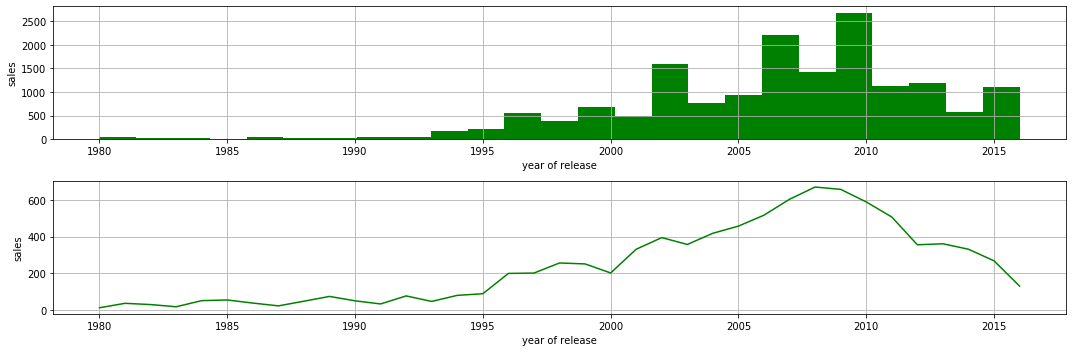

In [27]:
plt.figure(figsize=(15,5))
plt.subplot(2, 1 ,1)
(plt.hist(games
 .query('year_of_release != -1')['year_of_release'], color='g', bins=25)
)
plt.grid()
plt.xlabel('year of release')
plt.ylabel('sales')

plt.subplot(2, 1, 2)
(plt.plot(games
 .query('year_of_release != -1')
 .groupby('year_of_release')['total_sales'].sum(), color='g'))
plt.grid()
plt.xlabel('year of release')
plt.ylabel('sales')
plt.tight_layout()
plt.show()


Из графиков видно, что игровая индустрия начала набирать свои обороты с 1995 года, её пик был в 2008. С 2008 года началось падение, которое продолжалось вплоть до 2015.
В 2008 вышла игра "Wii Sports" - абсолютный рекордсмен по сборам, графики замечательно иллюстрируют это.

Не все данные являются релевантными, т.к нельзя сравнивать между собой доходы с игр, которые были выпущены в 90-х и, например в 00-х

По данным [источника](https://clck.ru/Nw8d5), игровая приставка "Wii" компании "Nintendo" была выпущена в 2006 году. Вероятно, она произвела фурор в игровой индустрии, все начали покупать игры на приставку, из-за этого графики имеют максимумы в 2008 (а гистограмма еще и где-то в районе 2006)


Узнаем, какие платформы были самыми прибыльными

In [28]:
games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

Построим графики для ТОП-8 платформ по продажам.

In [29]:
platform_list = games.groupby('platform')['total_sales'].sum().sort_values(ascending=False).index

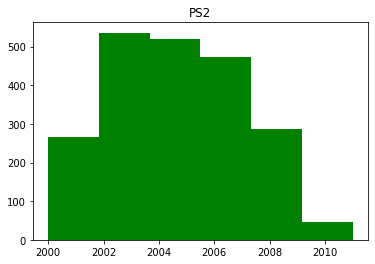

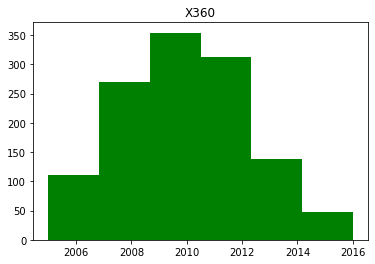

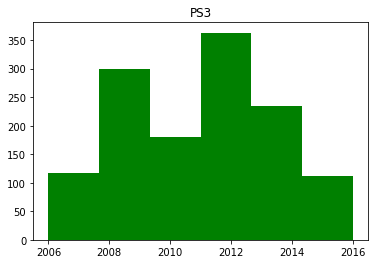

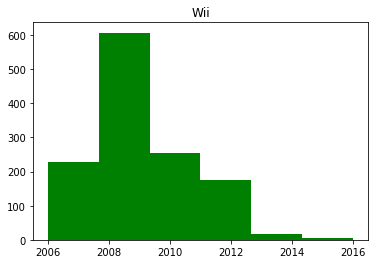

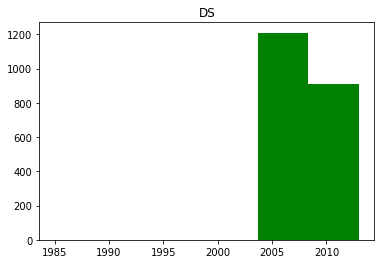

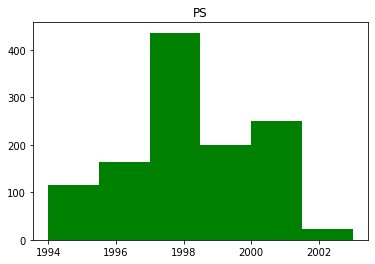

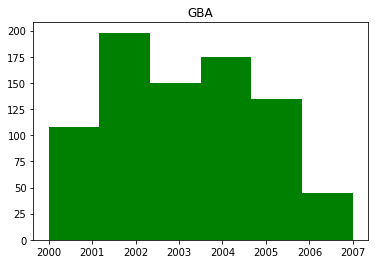

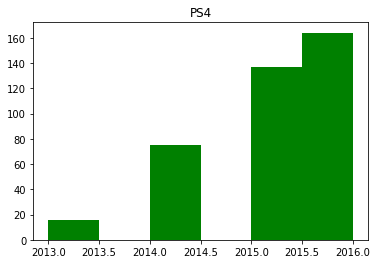

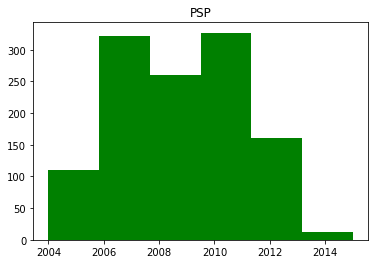

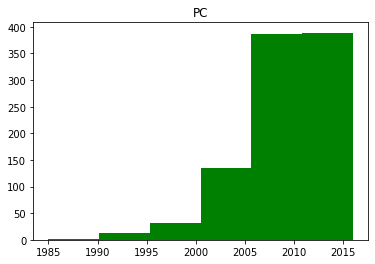

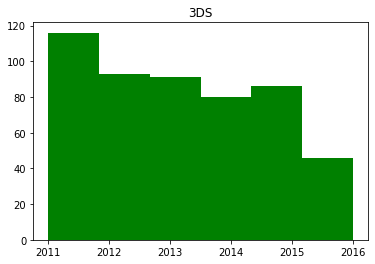

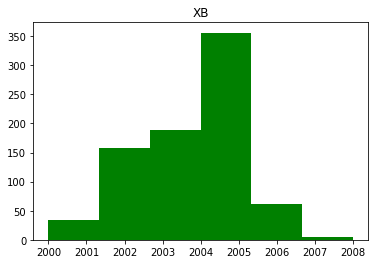

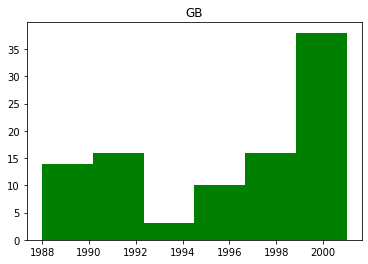

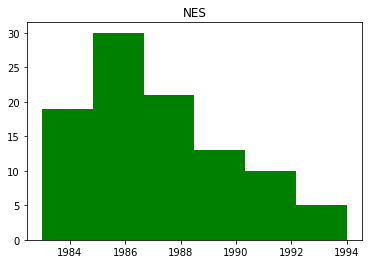

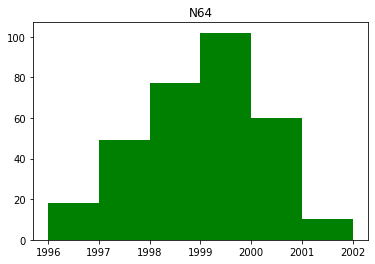

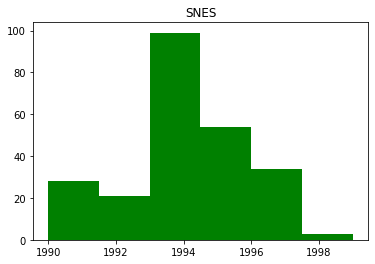

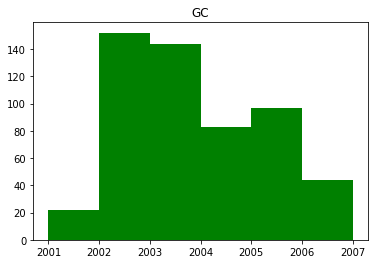

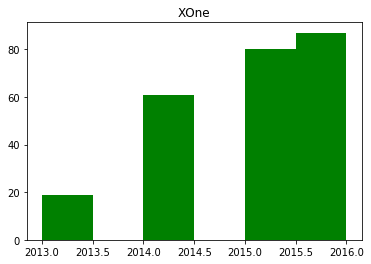

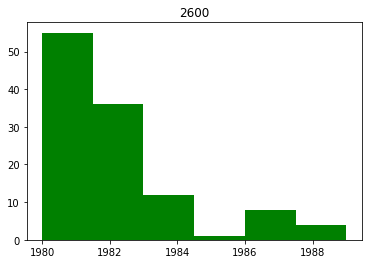

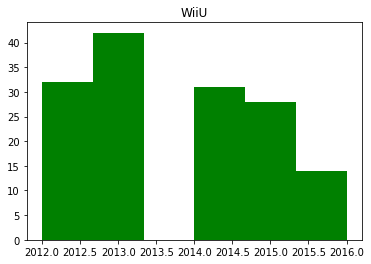

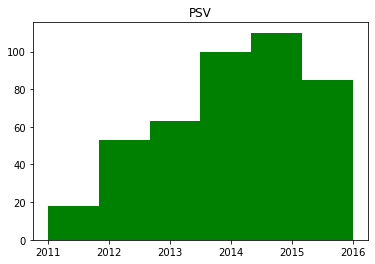

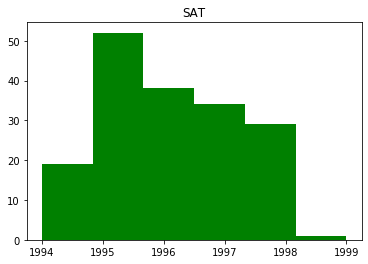

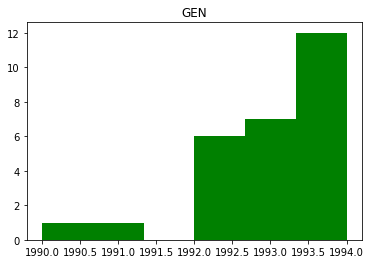

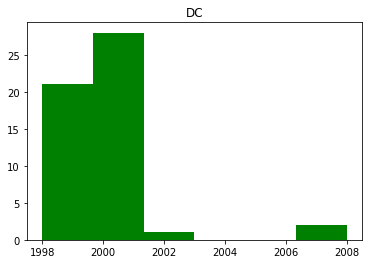

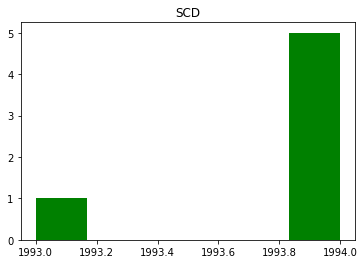

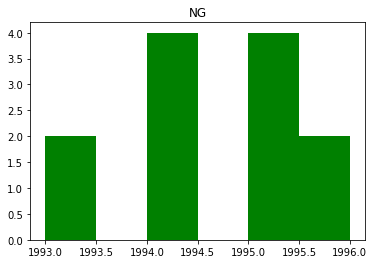

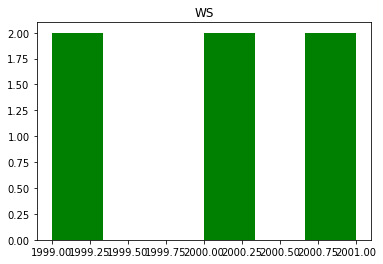

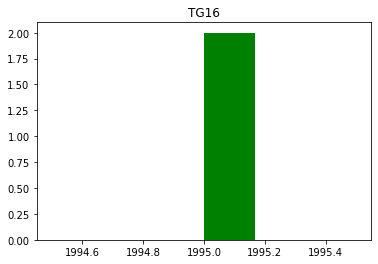

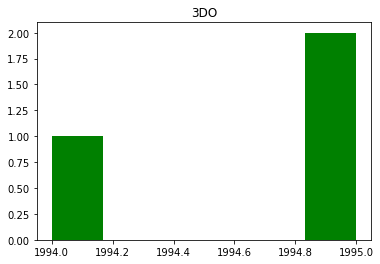

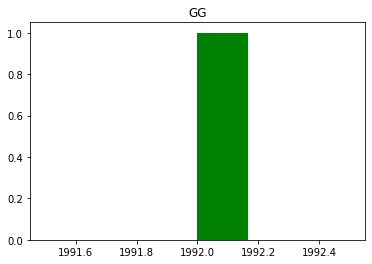

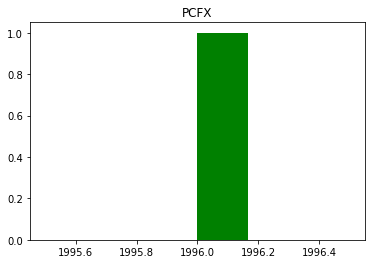

In [30]:
for j in platform_list:
    plt.figure()
    plt.hist(games[(games['year_of_release'] != -1) & (games['platform'] == j)]['year_of_release'], color='g', bins=6)
    plt.title(j)
    plt.show()

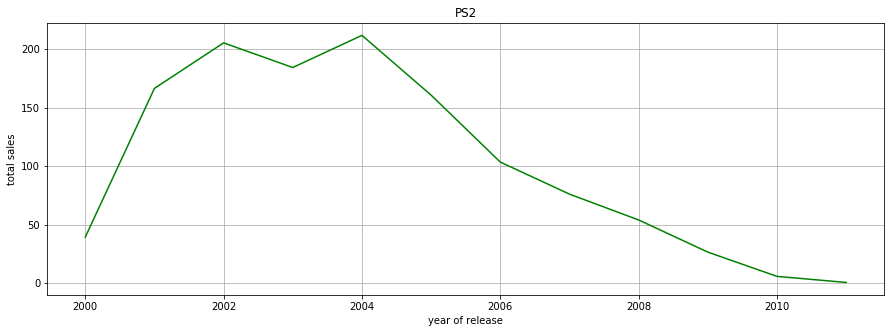

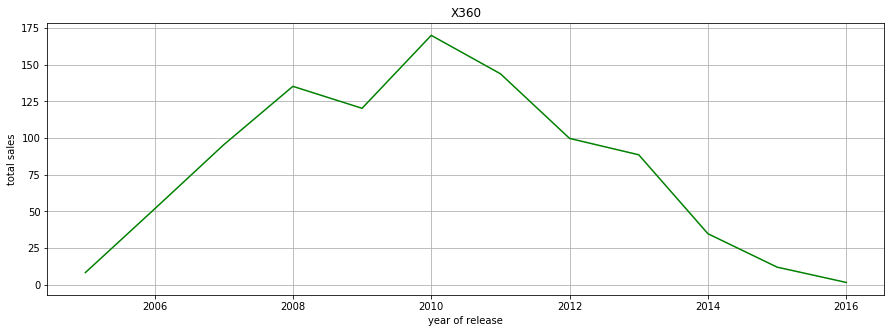

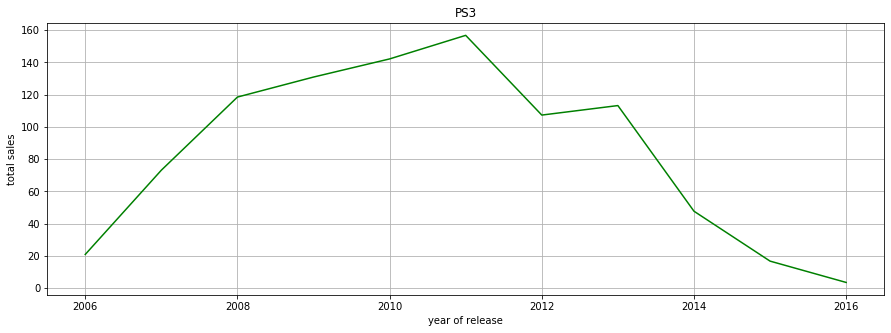

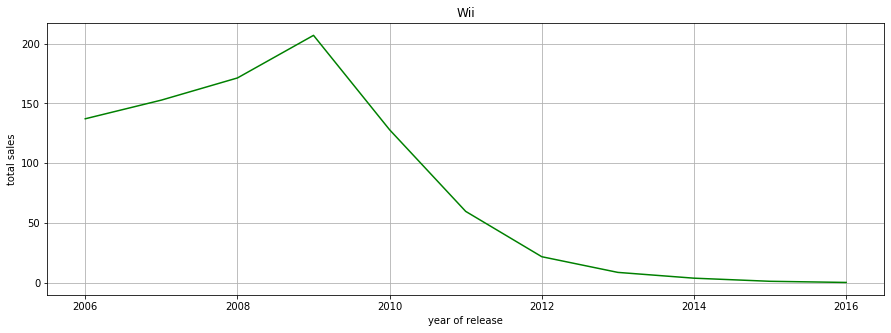

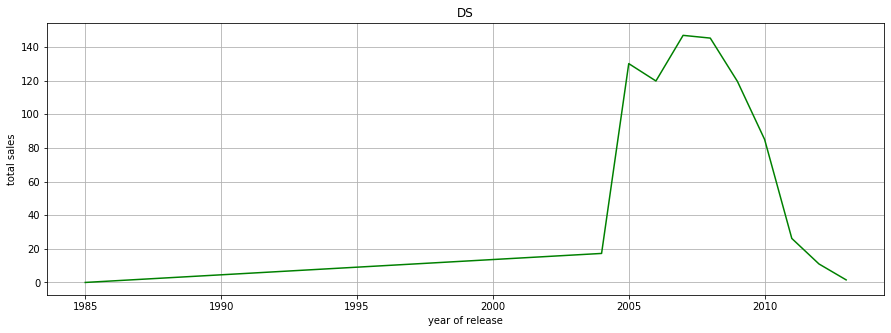

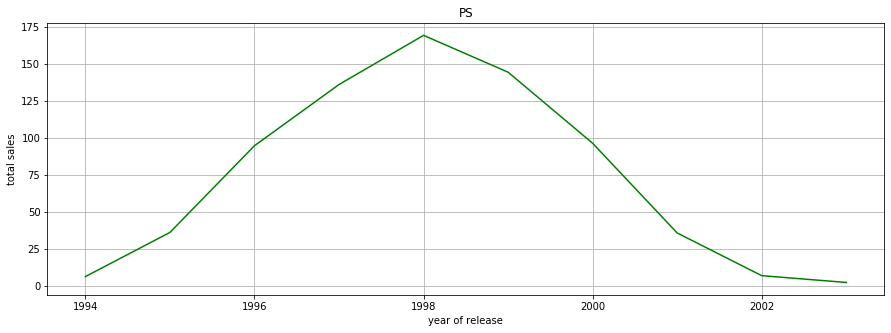

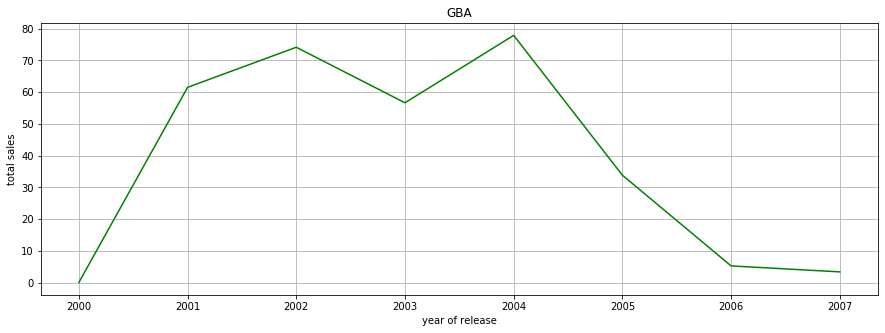

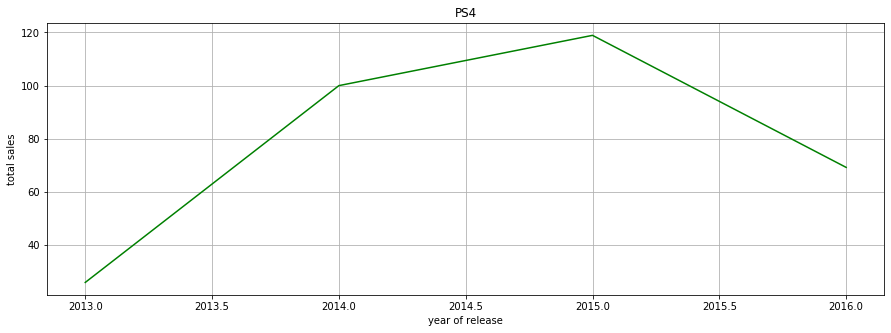

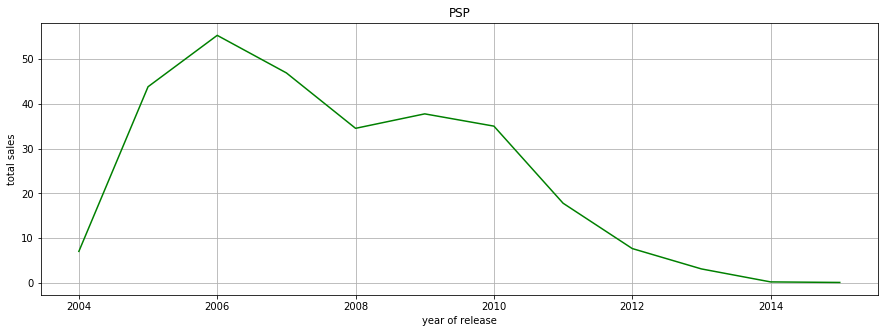

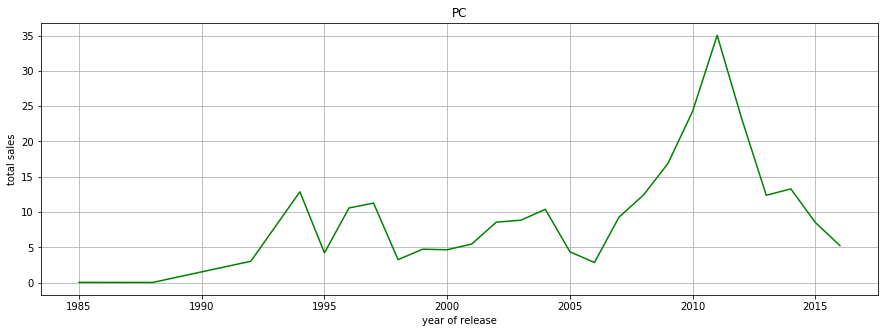

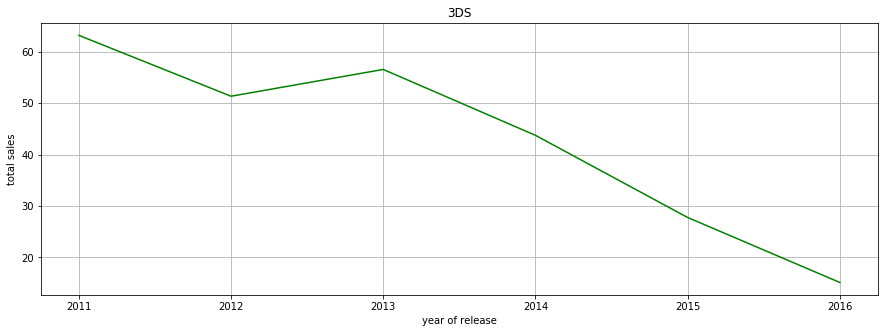

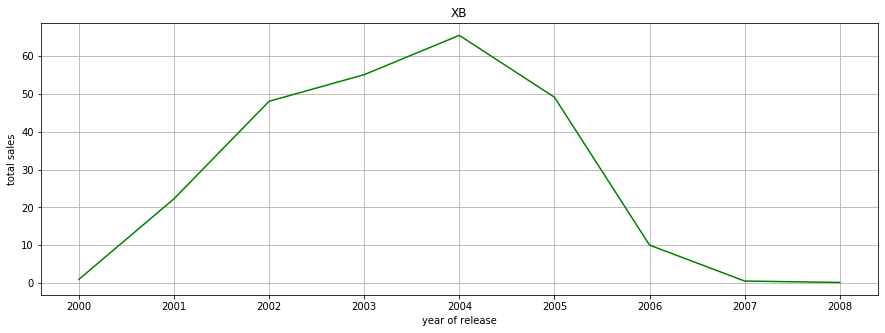

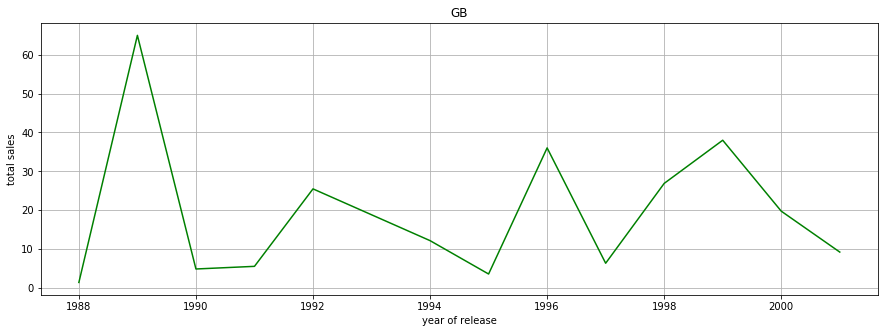

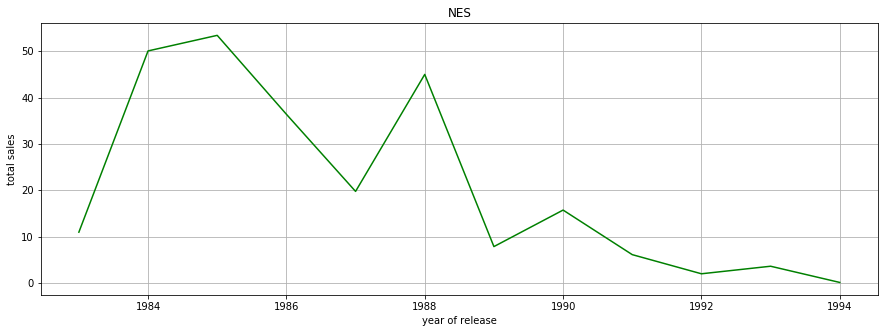

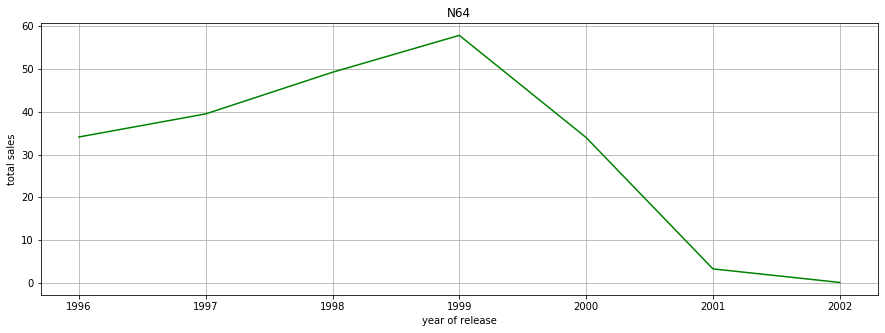

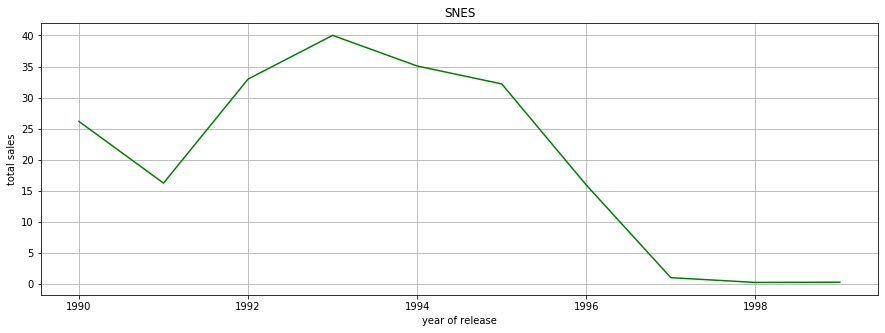

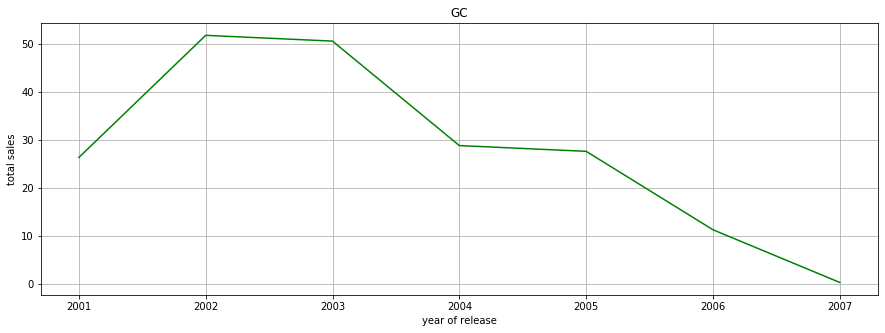

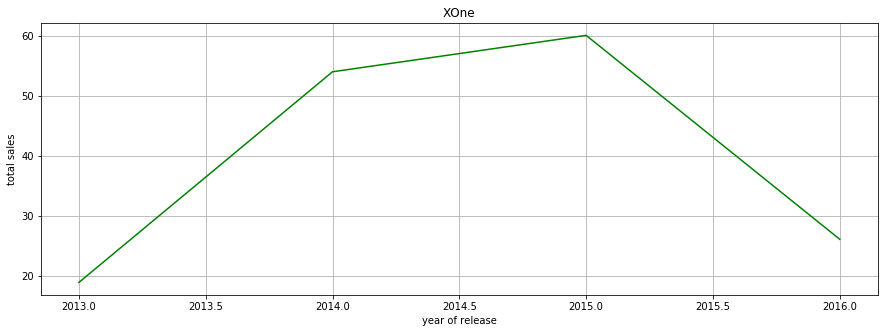

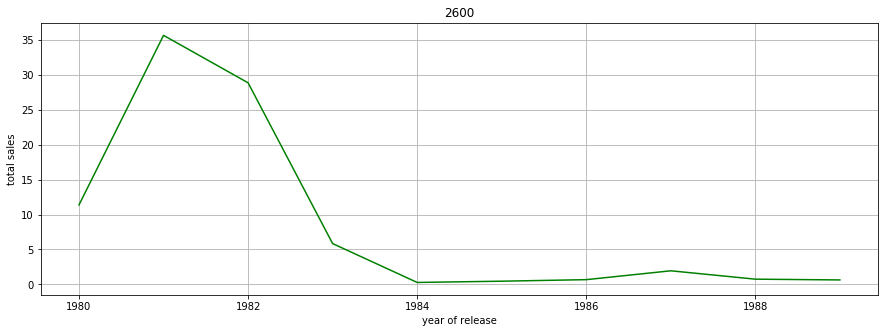

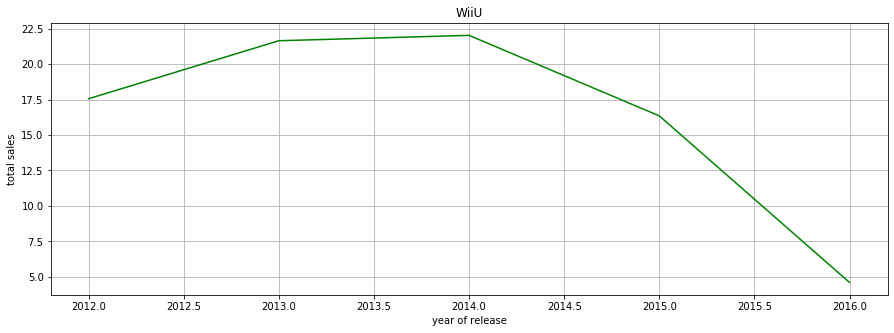

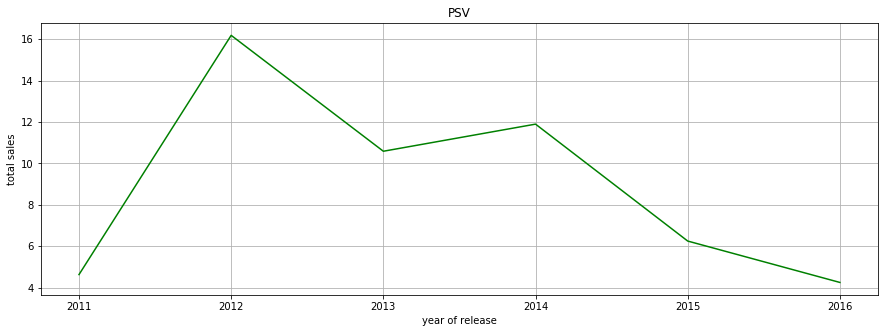

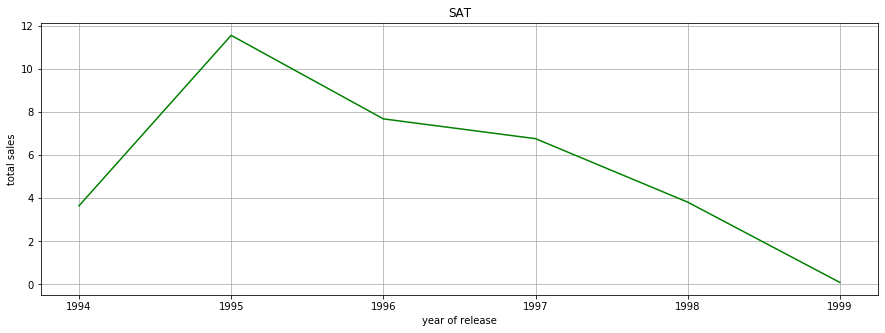

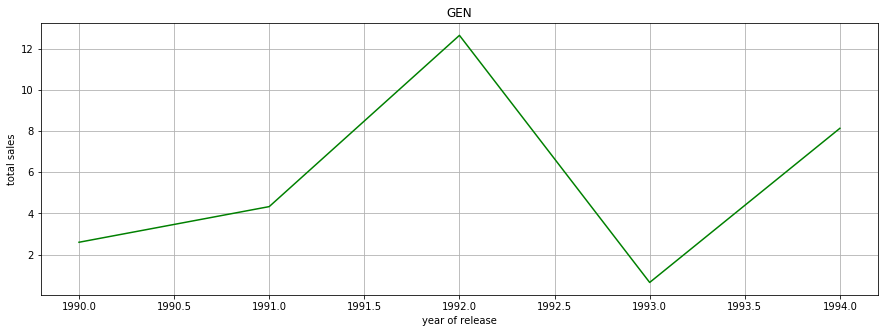

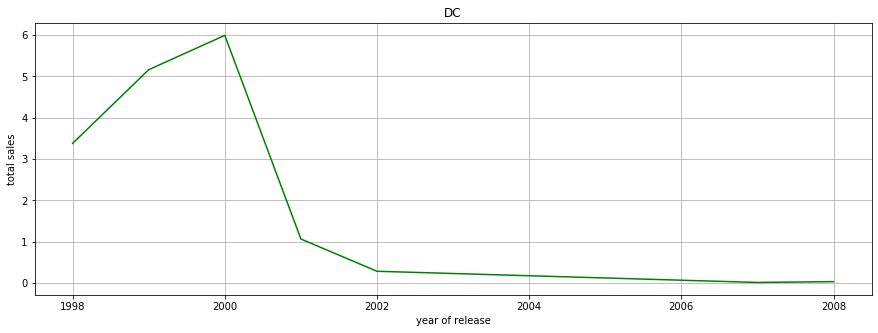

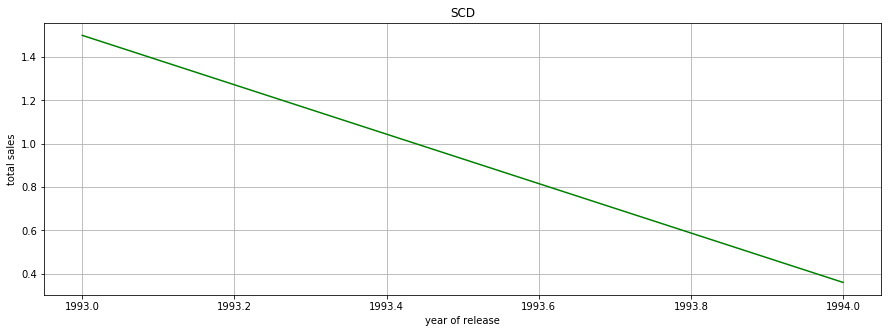

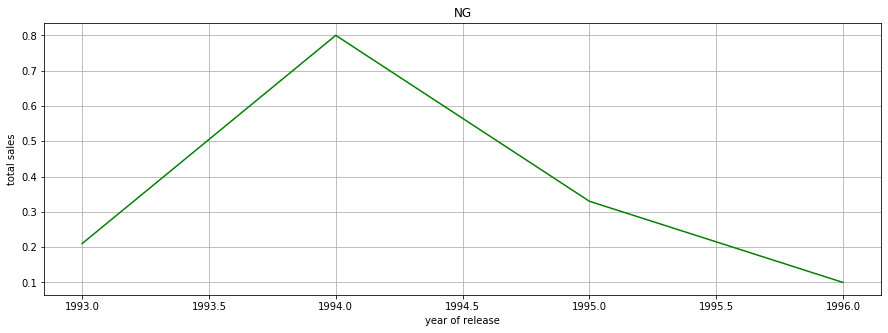

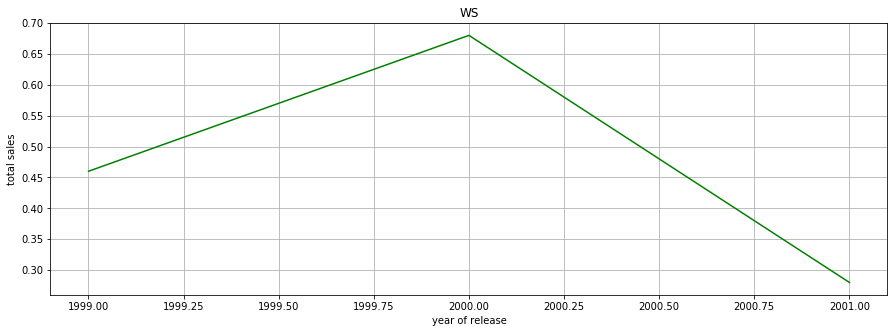

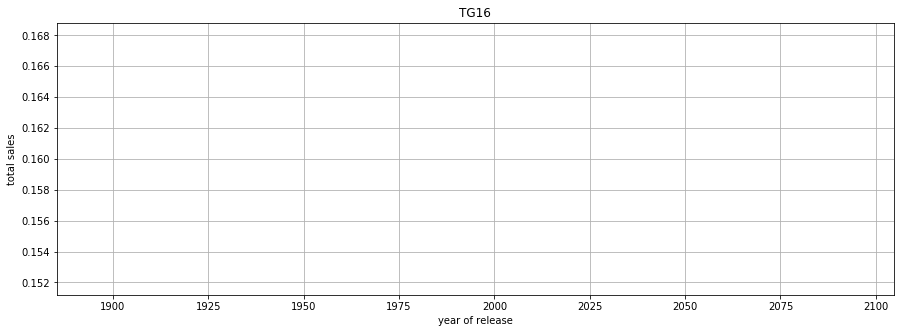

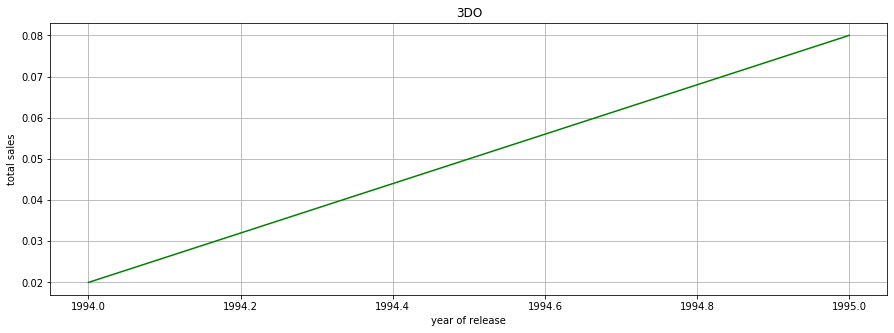

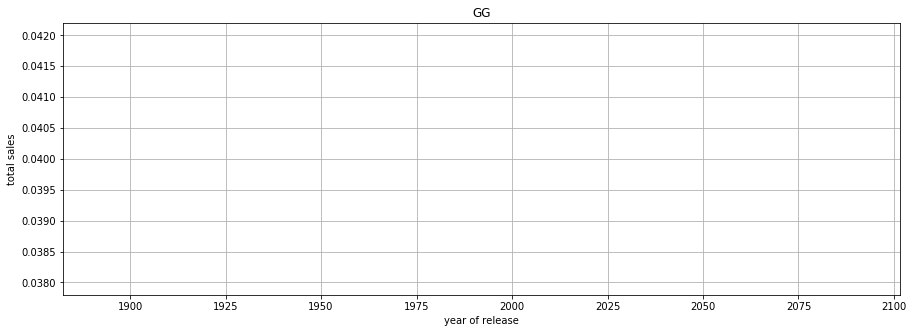

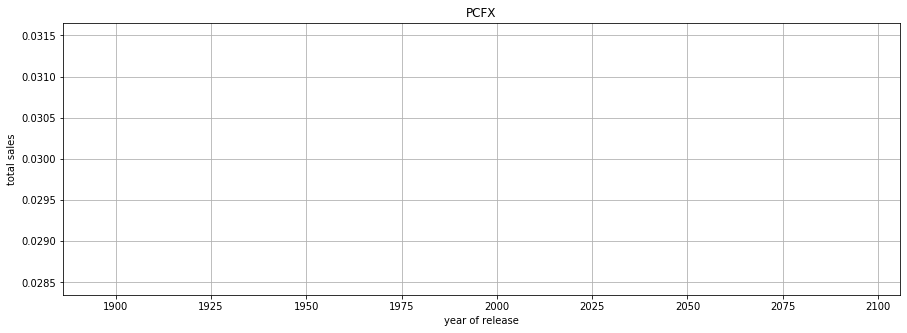

In [31]:
for platform in platform_list:
    plt.figure(figsize=(15,5))
    plt.plot((games[(games['platform'] == platform)
      & (games['year_of_release'] != -1)].sort_values('year_of_release')
    .groupby('year_of_release')['total_sales'].sum()), color='g')
    plt.title(platform)
    plt.xlabel('year of release')
    plt.grid()
    plt.ylabel('total sales')
    plt.show()

Как можно заметить из графиков, большинство платформ становились популярными достагиал пика продаж от двух до 5 лет, а после пика продажи опускались за 2-4 года. В среднем платформы рождались и умирали за 6 лет.

Стоит обратить внимание на график "PC" - в сравнении с остальными, доходы с компьютерных игр сильно меньше, чем с их консольных аналогов, но при этом данная платформа не "умирает", как остальные.

Узнаем в каком году были выпущены самые актуальные на данный момент платформы - "PS4" и "XOne"

In [32]:
games.query('platform == "PS4"').sort_values('year_of_release').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
2271,Injustice: Gods Among Us,PS4,2013,Fighting,0.46,0.30,0.00,0.16,-1,-1.0,undefined,0.92
4656,Just Dance 2014,PS4,2013,Misc,0.19,0.16,0.00,0.07,75,5.5,E10+,0.42
357,Battlefield 4,PS4,2013,Shooter,1.35,1.55,0.17,0.51,85,6.9,M,3.58
560,Killzone: Shadow Fall,PS4,2013,Shooter,0.89,1.33,0.08,0.39,73,6.8,M,2.69
323,Call of Duty: Ghosts,PS4,2013,Shooter,1.78,1.43,0.05,0.57,78,3.7,M,3.83


In [33]:
games.query('platform == "XOne"').sort_values('year_of_release').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
6878,Zumba Fitness: World Party,XOne,2013,Misc,0.17,0.05,0.0,0.02,73,6.2,E,0.24
2280,NBA 2K14,XOne,2013,Sports,0.70,0.11,0.0,0.09,86,5.7,E,0.90
2956,Need for Speed Rivals,XOne,2013,Racing,0.46,0.17,0.0,0.07,75,5.8,E10+,0.70
11772,Killer Instinct (2013),XOne,2013,Fighting,0.04,0.03,0.0,0.01,-1,-1.0,undefined,0.08
1959,LEGO Marvel Super Heroes,XOne,2013,Action,0.61,0.35,0.0,0.09,-1,6.8,E10+,1.05


Как можем видеть, самые успешные платформы (самые актуальные на данный момент) были выпущены в 2013 году.

**Актуальный период** определим начиная с 2013 года

In [34]:
actual_games = games[games['year_of_release'] >= 2013]
actual_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.0,undefined,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1,-1.0,undefined,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,undefined,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1,-1.0,undefined,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.0,undefined,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,undefined,0.01


Сгруппируем данные по платформам и построим график, чтобы визуализировать доходы.

In [35]:
platforms_grouped = actual_games.groupby('platform')['total_sales'].sum().reset_index()
platforms_grouped.sort_values('total_sales', ascending=False)

,platform,total_sales
4,PS4,314.14
3,PS3,181.43
10,XOne,159.32
0,3DS,143.25
9,X360,136.80
8,WiiU,64.63
2,PC,39.43
6,PSV,32.99
7,Wii,13.66
5,PSP,3.50


На графиках выше видно, что платформы PS3, 3DS, X360 уже неактуальны - в 2016 году доходы с этих платформ упали слишком низко

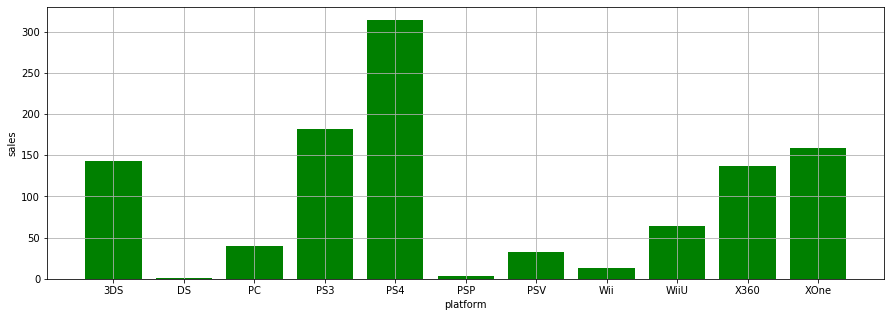

In [36]:
plt.figure(figsize=(15,5))
plt.bar(platforms_grouped['platform'], platforms_grouped['total_sales'], color='g')
plt.xlabel('platform')
plt.ylabel('sales')
plt.grid()
plt.show()

In [37]:
platforms_grouped.mean()

total_sales    99.153636
dtype: float64

In [38]:
platforms_grouped.median()

total_sales    64.63
dtype: float64

Разберем график выше:

- **PS4** - явный лидер, в 2016 году доходы с данной платформы самые высокие. Данная платформа **перспективная**.
- PS3 - платформа, которая с 2013 по 2016 успела заработать много денег, но ее доход в 2016 сильно меньше, чем в предыдущие года. Данну платфору нельзя назвать перспективной
- **XOne** - прямой конкурент PS4. В 2016 году данная платформа показала себяд достаточно уверенно, о чем говорить доход за 2016 год - 28 млн долларов. Данная платформа **перспективная**.
- 3DS и X360 стремительно умерли. Данные плафтормы успели принести деньги начиная с 2013 года, но в 2016 - неактульно
- **PC**. Данная платформа не приносит много денег, но ,в отличие от от других, она временами "выстреливает". Иначе говоря, она имеет несколько локальных максимумов. PC - платформа **перспективная**.
- PSV - данная платформа неактуальна в 2016 (судя по графикам выше)
- DS, PSP, Wii слишком мало заработали - неперспективные

Изобразим "ящики с усами" для каждой из трех перспективных платформ и определим их среднее.

In [39]:
actual_games.query('platform == "PS4"')['total_sales'].mean()

0.8013775510204081

In [40]:
actual_games.query('platform == "PC"')['total_sales'].mean()

0.20862433862433863

In [41]:
actual_games.query('platform == "XOne"')['total_sales'].mean()

0.6450202429149797

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


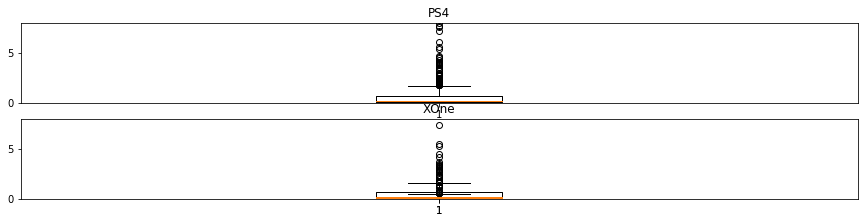

In [42]:
plt.figure(figsize=(15,5))
plt.subplot(311)
plt.boxplot(actual_games.query('platform == "PS4"')['total_sales'])
plt.ylim(0, 8)
plt.title('PS4')

plt.subplot(312)
plt.boxplot(actual_games.query('platform == "PC"')['total_sales'])
plt.ylim(0, 8)
plt.title('PC')

plt.subplot(312)
plt.boxplot(actual_games.query('platform == "XOne"')['total_sales'])
plt.ylim(0, 8)
plt.title('XOne')
plt.show()

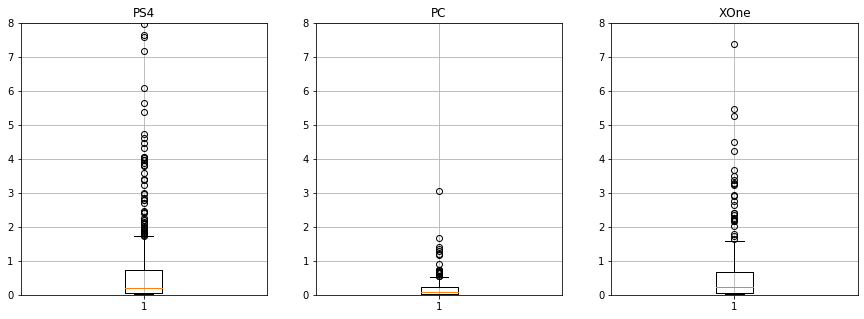

In [43]:
plt.figure(figsize=(15,5), )
plt.subplot(131)
plt.boxplot(actual_games.query('platform == "PS4"')['total_sales'])
plt.ylim(0, 8)
plt.grid()
plt.title('PS4')

plt.subplot(132)
plt.boxplot(actual_games.query('platform == "PC"')['total_sales'])
plt.ylim(0, 8)
plt.grid()
plt.title('PC')

plt.subplot(133)
plt.boxplot(actual_games.query('platform == "XOne"')['total_sales'])
plt.ylim(0, 8)
plt.title('XOne')
plt.grid()
plt.show()

По данным из [источника](https://pikabu.ru/story/pochemu_pkigryi_deshevle_konsolnyikh_6566853), игры на консолях ("PS4", "XOne") стоят почти в два раза больше, чем на компьютеры. Из этого понятно, почему средние значения ПК и консолей различаются так сильно.

Диаграммы размаха у консолей сильно похожи между собой, но отличаются от ПК. "Ящик" диаграммы рахмаха ПК узкий, это говорит о том, что 50 процентов игр набирают похожие сборы.

Посмотрим, влияют ли отзывы покупателей и критиков на продажи внутри отдельной платформы.

**PS4. Отзывы покупателей**

In [44]:
ps4_user = actual_games.query('platform == "PS4" and user_score != -1')
ps4_user.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83,5.7,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85,5.0,E,7.60
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87,6.5,M,7.17


Построим диаграмму рассеяния

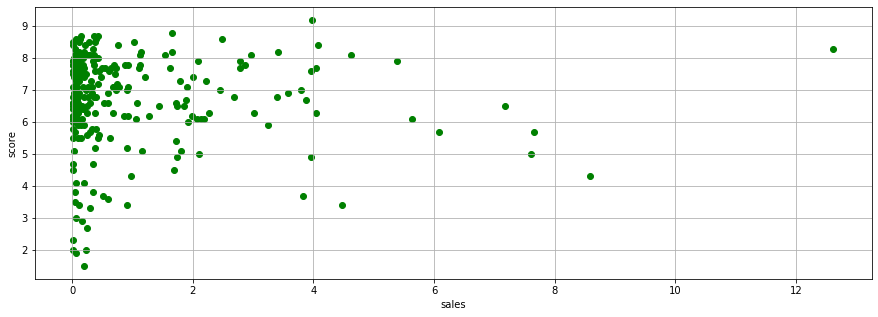

In [45]:
plt.figure(figsize=(15,5))
plt.scatter(ps4_user['total_sales'], ps4_user['user_score'], color='g')
plt.xlabel('sales')
plt.ylabel('score')
plt.grid()
plt.show()

Посмотрим диаграммы распределения, чтобы сказать, какой метод подсчета корреляции использовать

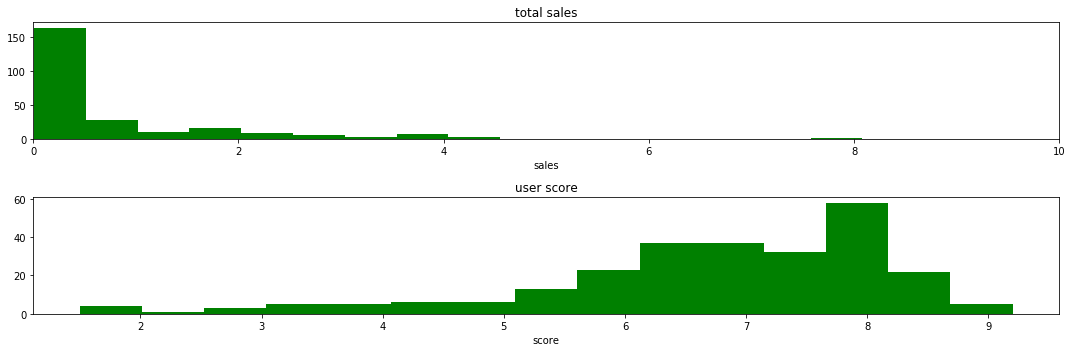

In [46]:
plt.figure(figsize=(15,5))
plt.subplot(211)
plt.hist((ps4_user['total_sales']), bins=25, color='g')
plt.xlim(0, 10)
plt.xlabel('sales')
plt.title('total sales')

plt.subplot(212)
plt.hist((ps4_user['user_score']), bins=15, color='g')
plt.xlabel('score')
plt.title('user score')
plt.tight_layout()
plt.show()

Диаграммы ненормальные, воспользуемся корреляцией Спирмена

In [47]:
ps4_user['total_sales'].corr(ps4_user['user_score'], method='spearman')

-0.028340257414850138

Коэффициент корреляции -0.02, т.е можно говорить, что связи нет. При покупке люди не смотрят общую оценку игроков.

Посмотрим, как влиет оценка критиков на продажу игры

**PS4. Отзывы критиков**

In [48]:
ps4_critic = actual_games.query('platform == "PS4" and critic_score != -1')
ps4_critic.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83,5.7,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85,5.0,E,7.60
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87,6.5,M,7.17


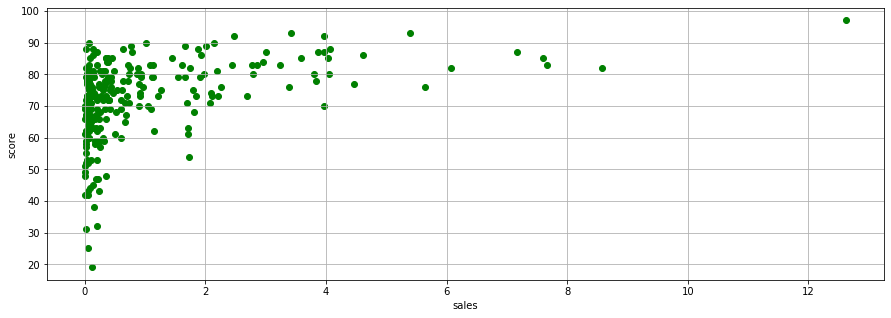

In [49]:
plt.figure(figsize=(15,5))
plt.scatter(ps4_critic['total_sales'], ps4_critic['critic_score'], color='g')
plt.xlabel('sales')
plt.ylabel('score')
plt.grid()
plt.show()

In [50]:
ps4_critic['total_sales'].corr(ps4_critic['critic_score'], method='spearman')

0.5082380957085771

Корреляция средняя, критики способны поднять продажи игры, поставив хорошие оценки

**XOne. Оценка пользователей**

In [51]:
xone_user = actual_games.query('platform == "XOne" and user_score != -1')
xone_user.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97,7.9,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81,5.4,M,5.26
242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84,6.4,T,4.49
270,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88,6.2,M,4.22
373,Assassin's Creed: Unity,XOne,2014,Action,2.27,0.90,0.00,0.33,72,4.1,M,3.50


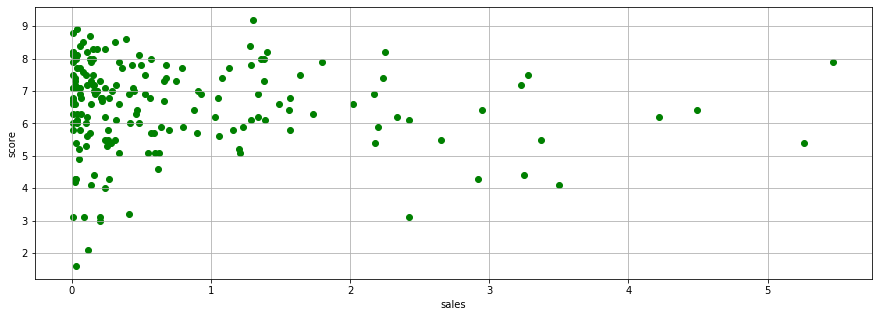

In [52]:
plt.figure(figsize=(15,5))
plt.scatter(xone_user['total_sales'], xone_user['user_score'], color='g')
plt.xlabel('sales')
plt.ylabel('score')
plt.grid()
plt.show()

In [53]:
xone_user['total_sales'].corr(xone_user['user_score'], method='spearman')

-0.10004846026194926

И снова получили, что "user_score" не влияет на продажи

**XOne. Оценка критиков**

In [54]:
xone_critic = actual_games.query('platform == "XOne" and critic_score != -1')
xone_critic.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97,7.9,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81,5.4,M,5.26
242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84,6.4,T,4.49
270,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88,6.2,M,4.22
373,Assassin's Creed: Unity,XOne,2014,Action,2.27,0.90,0.00,0.33,72,4.1,M,3.50


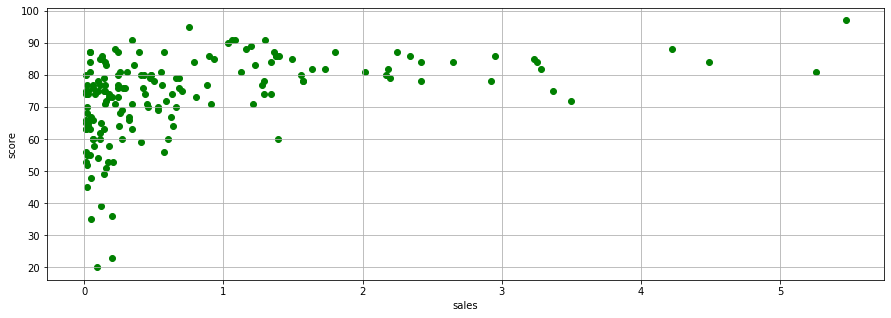

In [55]:
plt.figure(figsize=(15,5))
plt.scatter(xone_critic['total_sales'], xone_critic['critic_score'], color='g')
plt.xlabel('sales')
plt.ylabel('score')
plt.grid()
plt.show()

In [56]:
xone_critic['total_sales'].corr(xone_critic['critic_score'], method='spearman')

0.5315784768367893

Снова мнение критиков средне коррелирует с доходами с платформы.

**PC. Оценка пользователей**

In [57]:
pc_user = actual_games.query('platform == "PC" and user_score != -1')
pc_user.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
458,The Sims 4,PC,2014,Simulation,1.00,1.82,0.0,0.23,70,3.9,T,3.05
1095,StarCraft II: Heart of the Swarm,PC,2013,Strategy,0.83,0.66,0.0,0.18,86,7.9,T,1.67
1351,SimCity (2013),PC,2013,Simulation,0.48,0.77,0.0,0.17,64,2.2,E10+,1.42
1437,Battlefield 4,PC,2013,Shooter,0.39,0.87,0.0,0.10,81,6.0,M,1.36
1530,Fallout 4,PC,2015,Role-Playing,0.51,0.67,0.0,0.10,84,5.4,M,1.28


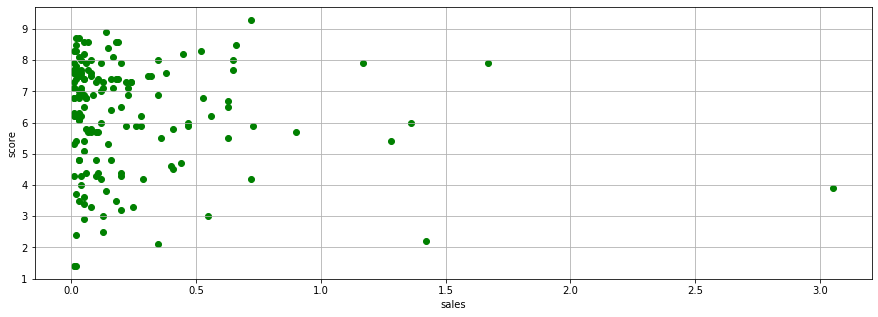

In [58]:
plt.figure(figsize=(15,5))
plt.scatter(pc_user['total_sales'], pc_user['user_score'], color='g')
plt.xlabel('sales')
plt.ylabel('score')
plt.grid()
plt.show()

In [59]:
pc_user['total_sales'].corr(pc_user['user_score'], method='spearman')

-0.09193451218678327

Взаимосвзяи нет

**PC. Оценка критиков**

In [60]:
pc_critic = actual_games.query('platform == "PC" and critic_score != -1')
pc_critic.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
458,The Sims 4,PC,2014,Simulation,1.00,1.82,0.0,0.23,70,3.9,T,3.05
1095,StarCraft II: Heart of the Swarm,PC,2013,Strategy,0.83,0.66,0.0,0.18,86,7.9,T,1.67
1351,SimCity (2013),PC,2013,Simulation,0.48,0.77,0.0,0.17,64,2.2,E10+,1.42
1437,Battlefield 4,PC,2013,Shooter,0.39,0.87,0.0,0.10,81,6.0,M,1.36
1530,Fallout 4,PC,2015,Role-Playing,0.51,0.67,0.0,0.10,84,5.4,M,1.28


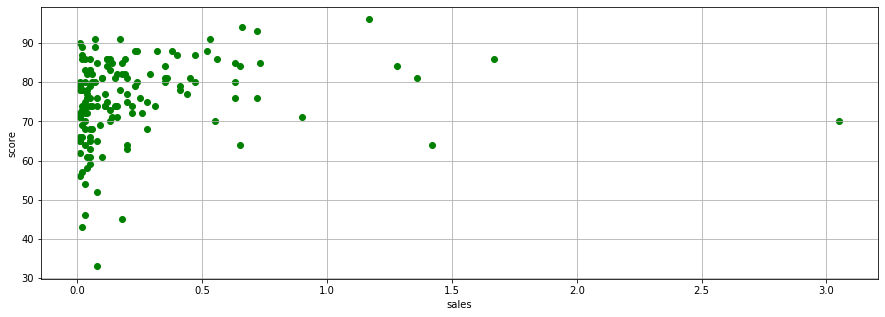

In [61]:
plt.figure(figsize=(15,5))
plt.scatter(pc_critic['total_sales'], pc_critic['critic_score'], color='g')
plt.xlabel('sales')
plt.ylabel('score')
plt.grid()
plt.show()

In [62]:
pc_critic['total_sales'].corr(pc_critic['critic_score'], method='spearman')

0.3602680205012558

Взаимосвязь средняя, но она уменьшилась относительно консолей. Пользователи компьютеров меньше опираются на отзывы перед покупкой игры. 
Возможно это из-за того, что на ПК легче получить доступ к пиратским ресурсам, из-за чего отзывы теряют свою необходиомость, а следовательно и взаимосвязь ухудшается.

Сгруппируем данные по жанрам

In [63]:
genres = actual_games.groupby('genre')['total_sales'].sum().reset_index()
genres

,genre,total_sales
0,Action,321.87
1,Adventure,23.64
2,Fighting,35.31
3,Misc,62.82
4,Platform,42.63
5,Puzzle,3.17
6,Racing,39.89
7,Role-Playing,145.89
8,Shooter,232.98
9,Simulation,21.76


Посмотрим, какие жанры являются самыми прибыльными, а какие приносят меньше всего денег

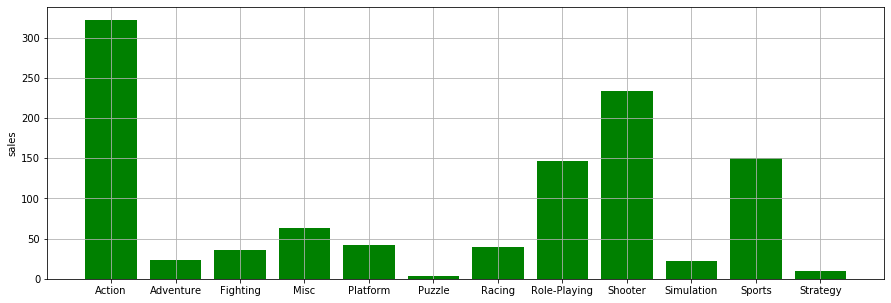

In [64]:
plt.figure(figsize=(15,5))
plt.bar(genres['genre'], genres['total_sales'], color='g')
plt.grid()
plt.ylabel('sales')
plt.show()

ТОП-3 самых прибыльных жанра: "Action", "Sports", "Shooter", причем первый из них сильно выделяется, но фоне остальных.

"Strategy", "Puzzle" и "Adventure" показывают самые слабые результаты.

## Вывод


Выделили перспективные платформы:
- "PS4"
- "XOne"
- "PC"

Определели самые прибыльные жанры:
- "Action"
- "Sports
- "Shooter"

Много визуализировали.

## Шаг 4. Составление портрета пользователей каждого региона

**Северная Америка. Платформы**

Для жителей Северной Америки определим самые популярные платформы

In [65]:
actual_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.0,undefined,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1,-1.0,undefined,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,undefined,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1,-1.0,undefined,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.0,undefined,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,undefined,0.01


In [66]:
na_platform = actual_games.pivot_table(index='platform', values='na_sales', aggfunc='sum').reset_index()
na_platform.sort_values('na_sales', ascending=False).head()

,platform,na_sales
4,PS4,108.74
10,XOne,93.12
9,X360,81.66
3,PS3,63.50
0,3DS,38.20


Изобразим график для наглядности

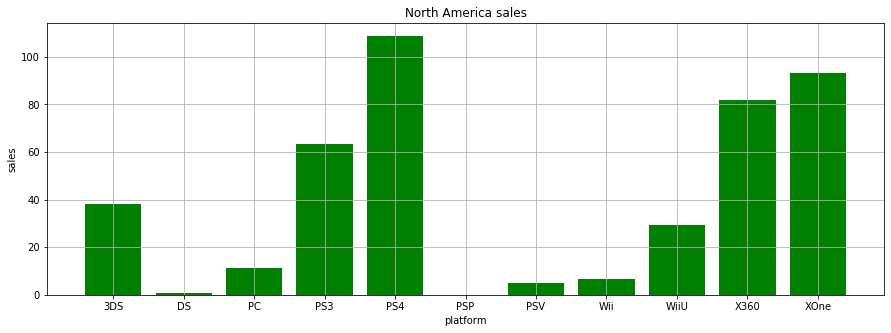

In [67]:
plt.figure(figsize=(15,5))
plt.bar(na_platform['platform'], na_platform['na_sales'], color='g')
plt.xlabel('platform')
plt.ylabel('sales')
plt.title('North America sales')
plt.grid()
plt.show()

X360, PS2, Wii самые популярные, найдем доли

In [68]:
na_platform_sum = na_platform['na_sales'].sum()
na_platform['shares_in_percent'] = (na_platform['na_sales'] / na_platform_sum) * 100
na_platform.sort_values('na_sales', ascending=False).head()

,platform,na_sales,shares_in_percent
4,PS4,108.74,24.842933
10,XOne,93.12,21.274360
9,X360,81.66,18.656188
3,PS3,63.50,14.507322
0,3DS,38.20,8.727239


Добавим строку со значение "Others"

In [69]:
na_platform_shares = na_platform.sort_values('na_sales', ascending=False).head()[['platform', 'shares_in_percent']]
na_platform_shares = na_platform_shares.append({'platform': 'Others',
                           'shares_in_percent': 100 - na_platform_shares['shares_in_percent'].sum()},
                         ignore_index=True)
na_platform_shares

,platform,shares_in_percent
0,PS4,24.842933
1,XOne,21.274360
2,X360,18.656188
3,PS3,14.507322
4,3DS,8.727239
5,Others,11.991958


ТОП-5 платформы заняли примерно 60% всего рынка.


**Северная Америка. Жанры**

Узнаем, какие жанры предпочитают жители Северной Америки

In [70]:
na_genres = actual_games.pivot_table(index='genre', values='na_sales', aggfunc='sum').reset_index()
na_genres.sort_values('na_sales', ascending=False).head()

,genre,na_sales
0,Action,126.05
8,Shooter,109.74
10,Sports,65.27
7,Role-Playing,46.40
3,Misc,27.49


Изобразим график для наглядности

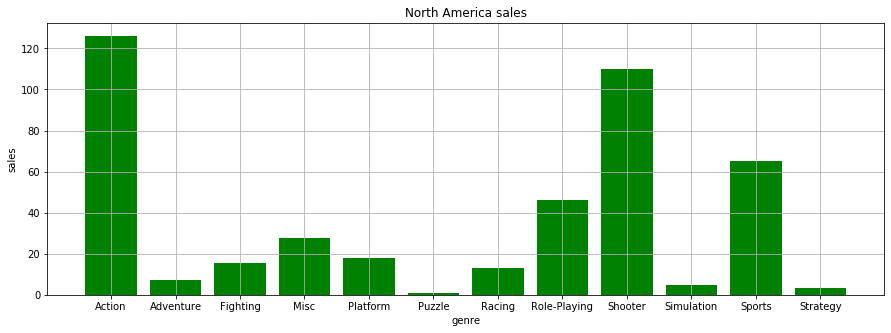

In [71]:
plt.figure(figsize=(15,5))
plt.bar(na_genres['genre'], na_genres['na_sales'], color='g')
plt.xlabel('genre')
plt.ylabel('sales')
plt.title('North America sales')
plt.grid()
plt.show()

In [72]:
na_genres_sum = na_genres['na_sales'].sum()
na_genres['shares_in_percent'] = (na_genres['na_sales'] / na_genres_sum) * 100
na_genres.sort_values('na_sales', ascending=False).head()

,genre,na_sales,shares_in_percent
0,Action,126.05,28.797606
8,Shooter,109.74,25.071394
10,Sports,65.27,14.911700
7,Role-Playing,46.40,10.600626
3,Misc,27.49,6.280414


Добавим строку "Others"

In [73]:
na_genres_shares = na_genres.sort_values('na_sales', ascending=False).head()[['genre', 'shares_in_percent']]
na_genres_shares = na_genres_shares.append({'genre': 'Others',
                                            'shares_in_percent': 100 - na_genres_shares['shares_in_percent'].sum()},
                                           ignore_index=True)
na_genres_shares

,genre,shares_in_percent
0,Action,28.797606
1,Shooter,25.071394
2,Sports,14.911700
3,Role-Playing,10.600626
4,Misc,6.280414
5,Others,14.338260


ТОП-5 жанров заняли примерно 68% рынка.

**Северная Америка. Рейтинг**

Узнаем, какие рейтинги самые прибыльные

In [74]:
na_rating = actual_games.query('rating != "undefined"').pivot_table(index='rating', values='na_sales', aggfunc='sum').reset_index()
na_rating.sort_values('na_sales', ascending=False).head()

,rating,na_sales
2,M,165.21
0,E,79.05
1,E10+,54.24
3,T,49.79


Вычислим доли

In [75]:
na_rating_sum = na_rating['na_sales'].sum()
na_rating['shares_in_percent'] = (na_rating['na_sales'] / na_rating_sum) * 100
na_rating.sort_values('na_sales', ascending=False).head(4)

,rating,na_sales,shares_in_percent
2,M,165.21,47.434609
0,E,79.05,22.696603
1,E10+,54.24,15.573229
3,T,49.79,14.295558


Добавим строку "Others"

In [76]:
na_shares_rating = na_rating.sort_values('na_sales', ascending=False).head(4)[['rating', 'shares_in_percent']]
na_shares_rating = na_shares_rating.append({'rating': 'Others',
                                            'shares_in_percent': 100 - na_shares_rating['shares_in_percent'].sum()},
                                          ignore_index=True)
na_shares_rating

,rating,shares_in_percent
0,M,47.434609
1,E,22.696603
2,E10+,15.573229
3,T,14.295558
4,Others,0.000000


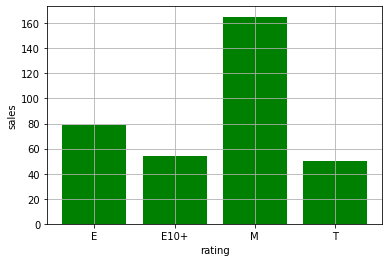

In [77]:
plt.figsize=(15,5)
plt.bar(na_rating['rating'], na_rating['na_sales'], color='g')
plt.xlabel('rating')
plt.ylabel('sales')
plt.grid()
plt.show()

Лучше всего продается категория "E", согласно [источнику](https://clck.ru/NyFt9) - категория, подходящая для всех, далее - "M", игры для людей страше 17 лет. И третья по популярности категория - "T" игры для подростков

**Европа. Платформы**

Сгруппируем по платформам и добавим столбец "Others"

In [78]:
eu_platform = actual_games.pivot_table(index='platform', values='eu_sales', aggfunc='sum').reset_index()
eu_platform.sort_values('eu_sales', ascending=False).head()

,platform,eu_sales
4,PS4,141.09
3,PS3,67.81
10,XOne,51.59
9,X360,42.52
0,3DS,30.96


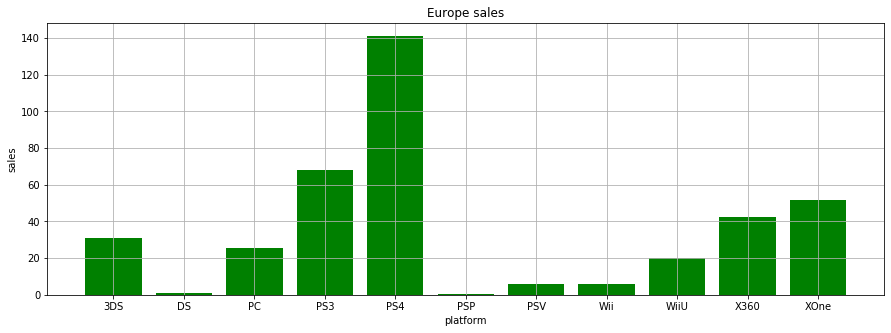

In [79]:
plt.figure(figsize=(15,5))
plt.bar(eu_platform['platform'], eu_platform['eu_sales'], color='g')
plt.xlabel('platform')
plt.ylabel('sales')
plt.title('Europe sales')
plt.grid()
plt.show()

In [80]:
eu_platform_sum = eu_platform['eu_sales'].sum()
eu_platform['shares_in_percent'] = (eu_platform['eu_sales'] / eu_platform_sum) * 100
eu_platform.sort_values('eu_sales', ascending=False).head()

,platform,eu_sales,shares_in_percent
4,PS4,141.09,35.971241
3,PS3,67.81,17.288326
10,XOne,51.59,13.152997
9,X360,42.52,10.840578
0,3DS,30.96,7.893328


In [81]:
eu_platform_shares = eu_platform.sort_values('eu_sales', ascending=False).head()[['platform', 'shares_in_percent']]
eu_platform_shares = eu_platform_shares.append({'platform': 'Others',
                                            'shares_in_percent': 100 - eu_platform_shares['shares_in_percent'].sum()},
                                           ignore_index=True)
eu_platform_shares

,platform,shares_in_percent
0,PS4,35.971241
1,PS3,17.288326
2,XOne,13.152997
3,X360,10.840578
4,3DS,7.893328
5,Others,14.853530


ТОП-5 содержит примерно 60% всех продаж.

**Европа. Жанры**

Узнаем, какие жанры предпочитают жители Европы.

In [82]:
eu_genres = actual_games.pivot_table(index='genre', values='eu_sales', aggfunc='sum').reset_index()
eu_genres['shares_in_percent'] = (eu_genres['eu_sales'] / eu_platform_sum) * 100
eu_genres.sort_values('eu_sales', ascending=False).head()

,genre,eu_sales,shares_in_percent
0,Action,118.13,30.117533
8,Shooter,87.86,22.400122
10,Sports,60.52,15.429722
7,Role-Playing,36.97,9.425592
6,Racing,20.19,5.147490


Добавим строку "Others"

In [83]:
eu_genres_shares = eu_genres.sort_values('eu_sales', ascending=False).head()[['genre', 'shares_in_percent']]
eu_genres_shares = eu_genres_shares.append({'genre': 'Others',
                                            'shares_in_percent': 100 - eu_genres_shares['shares_in_percent'].sum()},
                                           ignore_index=True)
eu_genres_shares

,genre,shares_in_percent
0,Action,30.117533
1,Shooter,22.400122
2,Sports,15.429722
3,Role-Playing,9.425592
4,Racing,5.147490
5,Others,17.479540


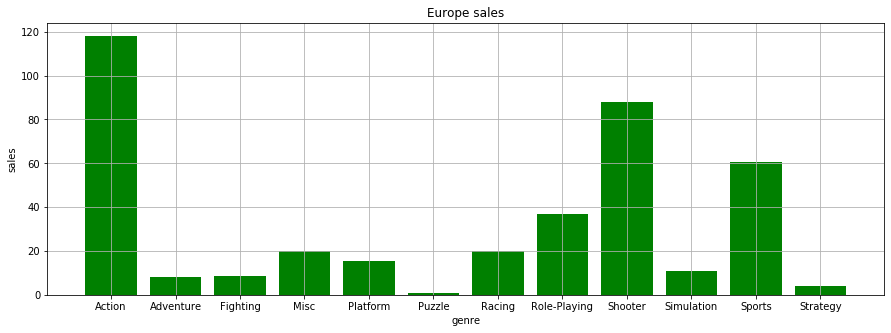

In [84]:
plt.figure(figsize=(15,5))
plt.bar(eu_genres['genre'], eu_genres['eu_sales'], color='g')
plt.xlabel('genre')
plt.ylabel('sales')
plt.title('Europe sales')
plt.grid()
plt.show()

Вычислим доли

In [85]:
eu_genres_sum = eu_genres['eu_sales'].sum()
eu_genres['shares_in_percent'] = (eu_genres['eu_sales'] / eu_genres_sum) * 100
eu_genres.sort_values('eu_sales', ascending=False).head()

,genre,eu_sales,shares_in_percent
0,Action,118.13,30.117533
8,Shooter,87.86,22.400122
10,Sports,60.52,15.429722
7,Role-Playing,36.97,9.425592
6,Racing,20.19,5.147490


In [86]:
eu_genres_shares = eu_genres.sort_values('eu_sales', ascending=False).head()[['genre', 'shares_in_percent']]
eu_genres_shares = eu_genres_shares.append({'genre': 'Others',
                                            'shares_in_percent': 100 - eu_genres_shares['shares_in_percent'].sum()},
                                           ignore_index=True)
eu_genres_shares

,genre,shares_in_percent
0,Action,30.117533
1,Shooter,22.400122
2,Sports,15.429722
3,Role-Playing,9.425592
4,Racing,5.147490
5,Others,17.479540


5 жанров содержат 70% покупок.

In [87]:
eu_rating = actual_games.query('rating != "undefined"').pivot_table(index='rating',
                                                                    values='eu_sales', aggfunc='sum').reset_index()
eu_rating.sort_values('eu_sales', ascending=False).head(4)

,rating,eu_sales
2,M,145.32
0,E,83.36
1,E10+,42.69
3,T,41.95


**Европа. Рейтинг**

Найдем самые прибыльные рейтинги и вычислим процентное соотношение

In [88]:
eu_rating_sum = eu_rating['eu_sales'].sum()
eu_rating['shares_in_percent'] = (eu_rating['eu_sales'] / eu_rating_sum) * 100
eu_rating.sort_values('eu_sales', ascending=False).head(4)

,rating,eu_sales,shares_in_percent
2,M,145.32,46.380697
0,E,83.36,26.605387
1,E10+,42.69,13.625048
3,T,41.95,13.388868


Добавим строку "Others"

In [89]:
eu_shares_rating = eu_rating.sort_values('eu_sales', ascending=False).head(4)[['rating', 'shares_in_percent']]
eu_shares_rating = eu_shares_rating.append({'rating': 'Others',
                                            'shares_in_percent': 100 - eu_shares_rating['shares_in_percent'].sum()},
                                          ignore_index=True)
eu_shares_rating

,rating,shares_in_percent
0,M,46.380697
1,E,26.605387
2,E10+,13.625048
3,T,13.388868
4,Others,0.000000


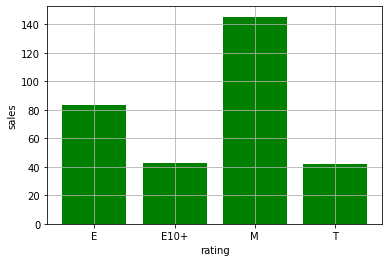

In [90]:
plt.figsize=(15,5)
plt.bar(eu_rating['rating'], eu_rating['eu_sales'], color='g')
plt.xlabel('rating')
plt.ylabel('sales')
plt.grid()
plt.show()

График схож с Северо-Американским.

**Япония. Платформы**

Выделим самые популярные платформы, изобразим график и добавим строку "Others"

In [91]:
jp_platform = actual_games.pivot_table(index='platform', values='jp_sales', aggfunc='sum').reset_index()
jp_platform.sort_values('jp_sales', ascending=False).head()

,platform,jp_sales
0,3DS,67.81
3,PS3,23.35
6,PSV,18.59
4,PS4,15.96
8,WiiU,10.88


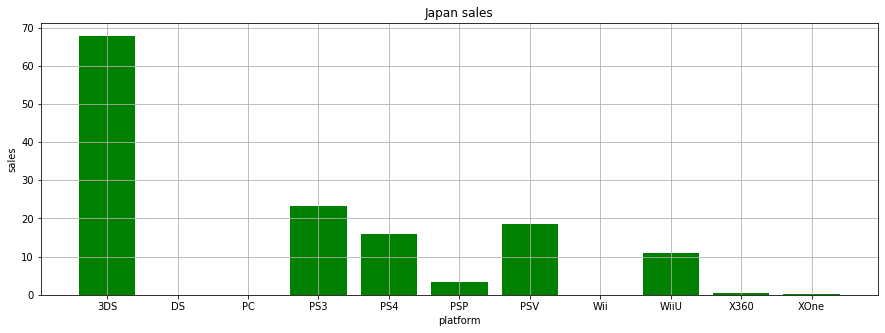

In [92]:
plt.figure(figsize=(15,5))
plt.bar( jp_platform['platform'],  jp_platform['jp_sales'], color='g')
plt.xlabel('platform')
plt.ylabel('sales')
plt.title('Japan sales')
plt.grid()
plt.show()

In [93]:
jp_platform_sum = jp_platform['jp_sales'].sum()
jp_platform['shares_in_percent'] = (jp_platform['jp_sales'] / jp_platform_sum) * 100
jp_platform.sort_values('jp_sales', ascending=False).head()

,platform,jp_sales,shares_in_percent
0,3DS,67.81,48.167353
3,PS3,23.35,16.586163
6,PSV,18.59,13.205001
4,PS4,15.96,11.336838
8,WiiU,10.88,7.728371


In [94]:
jp_platform_shares = jp_platform.sort_values('jp_sales', ascending=False).head()[['platform', 'shares_in_percent']]
jp_platform_shares = jp_platform_shares.append({'platform': 'others',
                           'shares_in_percent': 100 - jp_platform_shares['shares_in_percent'].sum()},
                         ignore_index=True)
jp_platform_shares

,platform,shares_in_percent
0,3DS,48.167353
1,PS3,16.586163
2,PSV,13.205001
3,PS4,11.336838
4,WiiU,7.728371
5,others,2.976275


ТОП-5 составляет 59%. Рейтинг заметно отличается от Европейского и Северо-Американского.

**Япония. Жанры**

Выделим самые популярные жанры в Японии и посчитаем процентное соотношение

In [95]:
jp_genres = actual_games.pivot_table(index='genre', values='jp_sales', aggfunc='sum').reset_index()
jp_genres['shares_in_percent'] = (jp_genres['jp_sales'] / jp_platform_sum) * 100
jp_genres.sort_values('jp_sales', ascending=False).head()

,genre,jp_sales,shares_in_percent
7,Role-Playing,51.04,36.255150
0,Action,40.49,28.761188
3,Misc,9.20,6.535019
2,Fighting,7.65,5.434011
8,Shooter,6.61,4.695269


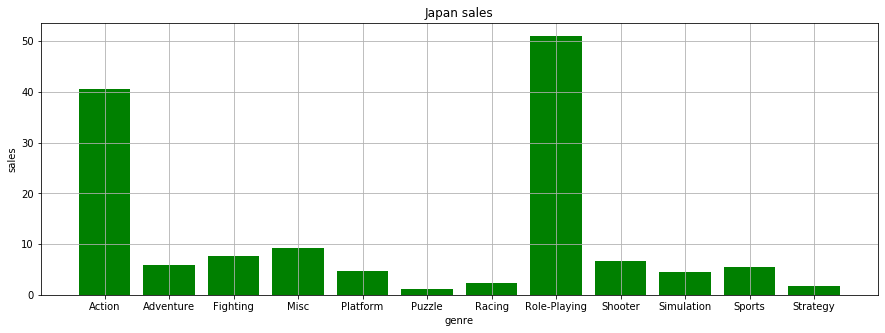

In [96]:
plt.figure(figsize=(15,5))
plt.bar(jp_genres['genre'], jp_genres['jp_sales'], color='g')
plt.xlabel('genre')
plt.ylabel('sales')
plt.title('Japan sales')
plt.grid()
plt.show()

Добавим строку "Others"

In [97]:
jp_genres_shares = jp_genres.sort_values('jp_sales', ascending=False).head()[['genre', 'shares_in_percent']]
jp_genres_shares = jp_genres_shares.append({'genre': 'Others',
                                            'shares_in_percent': 100 - jp_genres_shares['shares_in_percent'].sum()},
                                           ignore_index=True)
jp_genres_shares

,genre,shares_in_percent
0,Role-Playing,36.255150
1,Action,28.761188
2,Misc,6.535019
3,Fighting,5.434011
4,Shooter,4.695269
5,Others,18.319364


Появился новый лидер. Таблица отличается от Северо-Американской и Европейской.

**Япония. Рейтинг**

Выделим самые прибыльные рейтинги Японии

In [98]:
jp_rating = actual_games.query('rating != "undefined"').pivot_table(index='rating', values='jp_sales', aggfunc='sum').reset_index()
jp_rating

,rating,jp_sales
0,E,15.14
1,E10+,5.89
2,M,14.11
3,T,20.59


Добавим столбец с процентным соотношением "shares_in_percent"

In [99]:
jp_rating_sum = jp_rating['jp_sales'].sum()
jp_rating['shares_in_percent'] = (jp_rating['jp_sales'] / jp_rating_sum) * 100
jp_rating.sort_values('jp_sales', ascending=False).head(4)

,rating,jp_sales,shares_in_percent
3,T,20.59,36.945990
0,E,15.14,27.166697
2,M,14.11,25.318500
1,E10+,5.89,10.568814


Добавим строку "Others"

In [100]:
jp_shares_rating = jp_rating.sort_values('jp_sales', ascending=False).head(4)[['rating', 'shares_in_percent']]
jp_shares_rating = jp_shares_rating.append({'rating': 'Others',
                                            'shares_in_percent': 100 - jp_shares_rating['shares_in_percent'].sum()},
                                          ignore_index=True)
jp_shares_rating

,rating,shares_in_percent
0,T,36.945990
1,E,27.166697
2,M,25.318500
3,E10+,10.568814
4,Others,0.000000


Построим график для наглядности

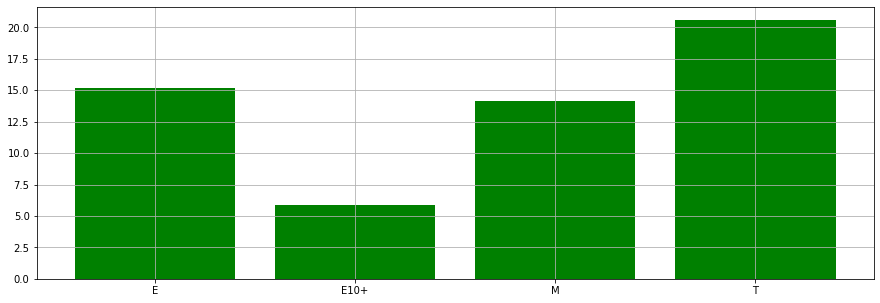

In [101]:
plt.figure(figsize=(15,5))
plt.bar(jp_rating['rating'], jp_rating['jp_sales'], color='g')
plt.grid()
plt.show()

В целом, график похож, единственное отличие - категория "T" заметно "подросла"

Сравним распределение продаж различных платформ в Северной Америке, Европе и Японии.
Для этого построим графики

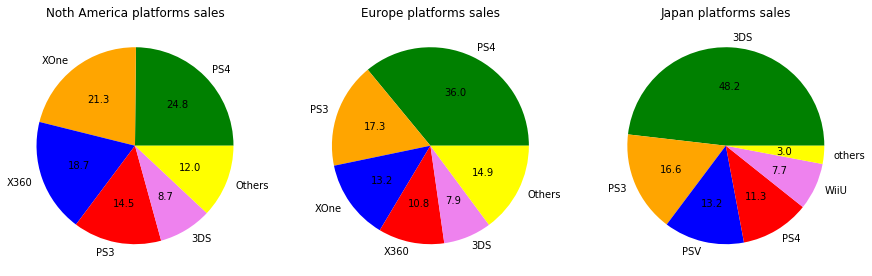

In [102]:
plt.figure(figsize=(15,5), )
plt.subplot(131)
plt.pie(na_platform_shares['shares_in_percent'],
        labels=na_platform_shares['platform'], autopct='%.1f', colors=['green', 'orange', 'blue', 'red', 'violet', 'yellow'])
plt.title('Noth America platforms sales')

plt.subplot(132)
plt.pie(eu_platform_shares['shares_in_percent'],
        labels=eu_platform_shares['platform'], autopct='%.1f', colors=['green', 'orange', 'blue', 'red', 'violet', 'yellow'])
plt.title('Europe platforms sales')

plt.subplot(133)
plt.pie(jp_platform_shares['shares_in_percent'],
        labels=jp_platform_shares['platform'], autopct='%.1f', colors=['green', 'orange', 'blue', 'red', 'violet', 'yellow'])
plt.title('Japan platforms sales')
plt.show()

У Японцев достаточно экстравагантный лидер. 

Сравним распределение продаж различных жанров в Северной Америке, Европе и Японии.
Для этого построим графики

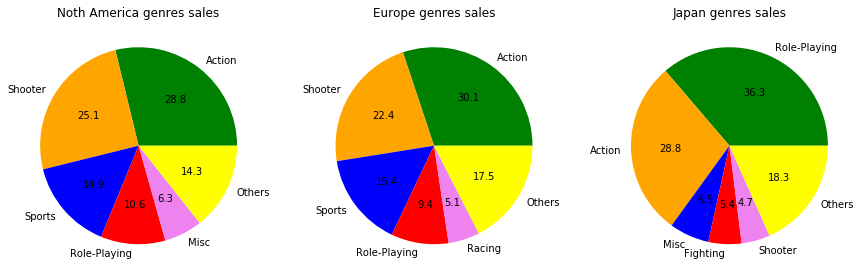

In [103]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.pie(na_genres_shares['shares_in_percent'],
        labels=na_genres_shares['genre'], autopct='%.1f', colors=['green', 'orange', 'blue', 'red', 'violet', 'yellow'])
plt.title('Noth America genres sales')

plt.subplot(132)
plt.pie(eu_genres_shares['shares_in_percent'],
        labels=eu_genres_shares['genre'], autopct='%.1f', colors=['green', 'orange', 'blue', 'red', 'violet', 'yellow'])
plt.title('Europe genres sales')

plt.subplot(133)
plt.pie(jp_genres_shares['shares_in_percent'],
        labels=jp_genres_shares['genre'], autopct='%.1f', colors=['green', 'orange', 'blue', 'red', 'violet', 'yellow'])
plt.title('Japan genres sales')
plt.show()

У Японцев снова экставагантный лидер

Сравним распределение продаж различных категорий в Северной Америке, Европе и Японии. Для этого построим графики

Исключим популярный рейтинг "E", чтобы диаграммы выглядели более наглядно

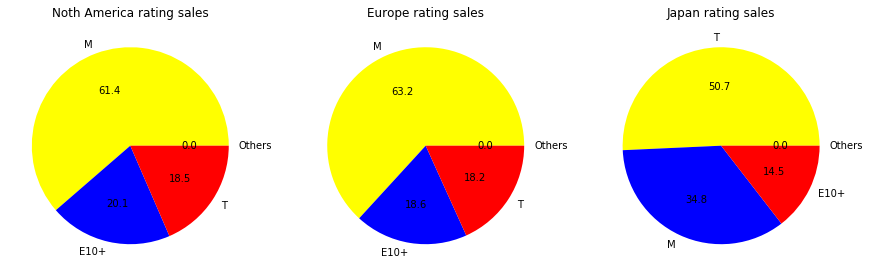

In [104]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.pie(na_shares_rating.query('rating != "E"')['shares_in_percent'],
        labels=na_shares_rating.query('rating != "E"')['rating'], autopct='%.1f', colors=['yellow', 'blue', 'red', 'violet'])
plt.title('Noth America rating sales')

plt.subplot(132)
plt.pie(eu_shares_rating.query('rating != "E"')['shares_in_percent'],
        labels=eu_shares_rating.query('rating != "E"')['rating'], autopct='%.1f', colors=['yellow', 'blue', 'red', 'violet'])
plt.title('Europe rating sales')

plt.subplot(133)
plt.pie(jp_shares_rating.query('rating != "E"')['shares_in_percent'],
        labels=jp_shares_rating.query('rating != "E"')['rating'], autopct='%.1f', colors=['yellow', 'blue', 'red', 'violet'])
plt.title('Japan rating sales')
plt.show()

Северная Америка и Европа - одинаковые, но Япония показывает совершенно другие результаты - если исключить категорию "E", то "T" занимает половину рынка, далее следует "M" (лидер Северной Америки и Европы), а уже после - E10+

Отличия имеются, но в целом ТОП-3 (и ТОП-4, учитывая категорию "E") одинаковые. Вкус Японцев часто отличается, от других национальностей.
Из этого следует вывод, что **рейтинг ESRB не влияет на продажи в отдельных регионах**

## Вывод

Были выявлены самые популярные платформы и жанры в каждом из трех регионов.

По итогу:

Для Северной Америки самая популярная платформа X360, жанр игры - "Action", и рейтинг ESRB - "E".

Для Европейцев: платформа.- PS2, жанр - "Action", возрастная категория - "E"

Для Японцев: платформа - DS, жанр - "Role-Playing", возрастная категория - "E"

## Шаг 5. Проверка гипотез

###  Гипотеза 1

Гипотеза: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"

In [102]:
xbox_sample = actual_games.query('platform == "XOne" and user_score != -1')
pc_sample = actual_games.query('platform == "PC" and user_score != -1')   

Изобразим распределения соответствующих столбцов

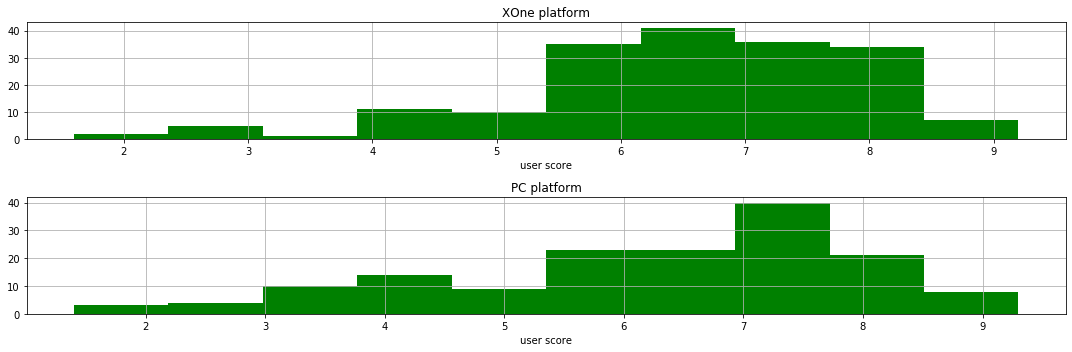

In [103]:
plt.figure(figsize=(15,5))
plt.subplot(211)
plt.hist(xbox_sample['user_score'], color='g',)
plt.xlabel('user score')
plt.title('XOne platform')
plt.grid()

plt.subplot(212)
plt.hist(pc_sample['user_score'], color='g')
plt.xlabel('user score')
plt.title('PC platform')
plt.grid()
plt.tight_layout()
plt.show()

Вычислим дисперсии

In [104]:
np.var(xbox_sample.query('platform == "XOne" and user_score != -1')['user_score'], ddof=1)

1.9069968429360695

In [105]:
np.var(pc_sample['user_score'], ddof=1)

3.035892752408882

Распределения не являются нормальными, данные независимые, выборки две, следовательно воспользуемся критерием Мана-Уитни.

Сформулируем гиппотезу H0: **"Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"**

Тогда H1: **"Средние пользовательские рейтинги платформ Xbox One и PC не равны"**

Установим размер статистической значимости на 5%

In [106]:
whats_p = st.mannwhitneyu(xbox_sample['user_score'], pc_sample['user_score']).pvalue
if whats_p > 0.05:
    print('Не удалось опроврегнуть гипотезу H0', whats_p)
else:
    print('H0 - опровержена', whats_p)

Не удалось опроврегнуть гипотезу H0 0.2505503367311187


Взглянем на ящик с усами для каждого из столбцов

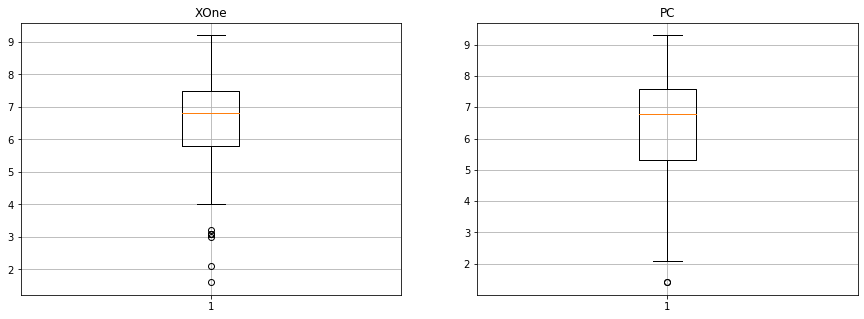

In [107]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.boxplot(xbox_sample['user_score'])
plt.grid()
plt.title('XOne')

plt.subplot(122)
plt.boxplot(pc_sample['user_score'])
plt.grid()
plt.title('PC')
plt.show()

Боксплоты похожи, гипотеза H0 не была опровергнута

Ответ: **средние пользовательские значения одинаковые**

### Гипотеза 2

Гипотеза: "Средние пользовательские рейтинги жанров Action и Sports разные"

In [108]:
action_sample = actual_games.query('genre == "Action" and user_score != -1')
sports_sample = actual_games.query('genre == "Sports" and user_score != -1')

Изобразим распределения соответствующих столбцов

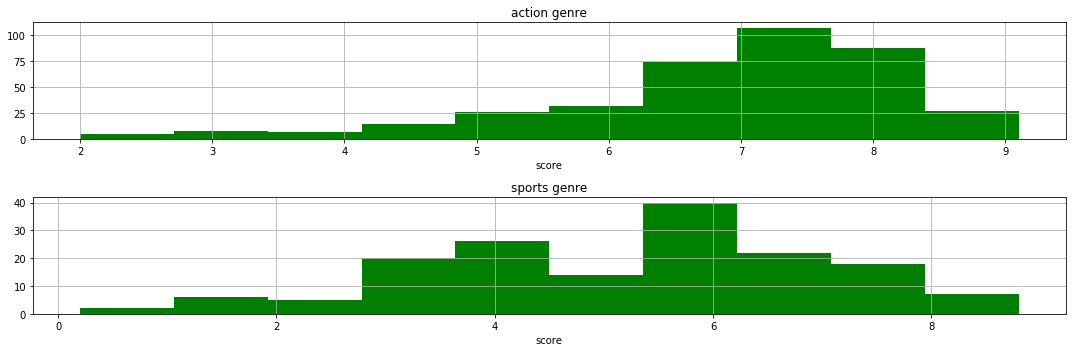

In [109]:
plt.figure(figsize=(15,5))
plt.subplot(211)
plt.hist(action_sample['user_score'], color='g')
plt.xlabel('score')
plt.grid()
plt.title('action genre')

plt.subplot(212)
plt.hist(sports_sample['user_score'], color='g')
plt.xlabel('score')
plt.grid()
plt.title('sports genre')
plt.tight_layout()
plt.show()

Вычислим дисперсии

In [110]:
np.var(action_sample['user_score'], ddof=1)

1.7693609042482705

In [111]:
np.var(sports_sample['user_score'], ddof=1)

3.180612814465409

Распределения снова не являются нормальными, данные независимые, выборки две, следовательно воспользуемся критерием Мана-Уитни.

Сформулируем гипотезу H0: **"Средние пользовательские рейтинги жанров Action и Sports равны"**

Тогда H1: **"Средние пользовательские рейтинги жанров Action и Sports разные"**

Установим размер статистической значимости на 5%

In [112]:
whats_p = st.mannwhitneyu(action_sample['user_score'], sports_sample['user_score']).pvalue
if whats_p > 0.05:
    print('Не удалось опроврегнуть гипотезу H0', whats_p)
else:
    print('H0 - опровержена', whats_p)

H0 - опровержена 7.594585292409964e-24


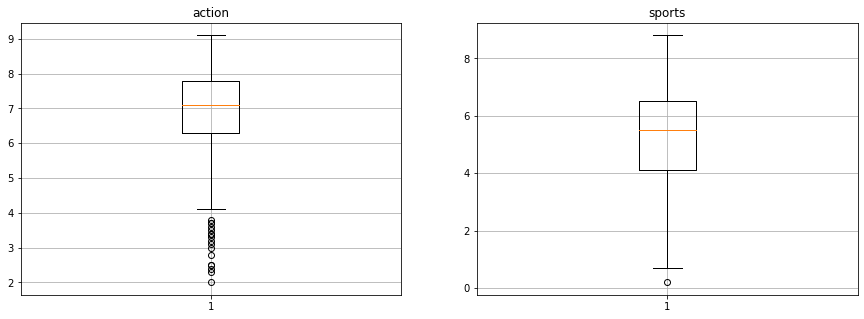

In [113]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.boxplot(action_sample['user_score'])
plt.grid()
plt.title('action')

plt.subplot(122)
plt.boxplot(sports_sample['user_score'])
plt.grid()
plt.title('sports')
plt.show()

Боксплоты сильно различаются, гипотеза опровержена

Ответ: **средние пользовательские значения различаются**

## Вывод

Проверили две гипотезы, основываясь на критерий Манна-Уитни и получили следующие результаты:
- **Средние пользовательские рейтинги платформ Xbox One и PC равны**
- **Средние пользовательские рейтинги жанров Action и Sports не равны**

## Шаг 5. Общий вывод

В итоге были предобработаны данные: избавились от пропущенных значений, привели стобцы к нужным типам, добавили стобец "total_sales"; 

В рамках исследовательского анализа данных было произведено множество графиков, которые помогают понимать данные.

Также был составлен портрет пользователя кажого региона: выяснили, что Японцы "с другой планеты", а Северо-Американцы и Европейцы чем-то похожи.


Выяснили, какая из гипотез верна, а какая не очень.